In [2]:
import glob
import ast
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Time taken by each Optimization Technique for optimization

In [48]:
# combine the dataframe
#frames = [ process_frame(f) for f in file ]
frame1 = pd.read_csv('/content/drive/My Drive/XGBoost_results/Final-Hyperopt-workbook.csv')
frame2 = pd.read_csv('/content/drive/My Drive/XGBoost_results/Final-optuna-workbook.csv')
frame3 = pd.read_csv('/content/drive/My Drive/XGBoost_results/Final-randomsearch-workbook.csv')
frames = [frame1, frame2, frame3]
result = pd.concat(frames)
result = result.reset_index().drop('index', axis = 1)
result.head()

,Num,Seed,Algorithm,Opt_time(hr),train_time(sec),PR_AUC,ROC_AUC,Precision,Recall,F1-Score,best_F1-Score,Threshold,optim_type
0,727,1,XGBoost,16.93,23.74,0.73,0.96,0.255717,0.866197,0.394864,0.80899,0.980,Hyperopt
1,727,1,Catboost,5.45,2.49,0.65,0.96,0.075832,0.866197,0.139456,0.75486,0.880,Hyperopt
2,727,1,LGBM,11.57,9.24,0.74,0.94,0.606557,0.781690,0.683077,0.63291,0.999,Hyperopt
3,992,10,XGBoost,22.51,37.13,0.80,0.97,0.495902,0.852113,0.626943,0.81061,0.984,Hyperopt
4,992,10,Catboost,6.51,5.72,0.67,0.96,0.085374,0.859155,0.155315,0.76265,0.963,Hyperopt


## XGBoost

In [49]:
XGBoost_meantime = np.mean(result[result['Algorithm']=='XGBoost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'])
XGBoost_meantime

optim_type
Hyperopt        18.564
Optuna          17.738
RandomSearch    25.274
dtype: float64

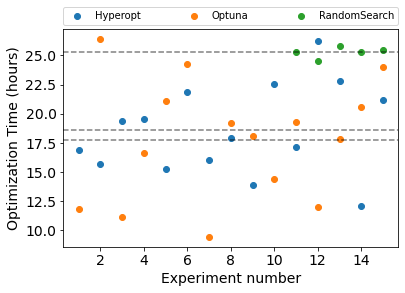

In [33]:
# train time on 300 trials
#plt.plot(figsize=(18,12))
#plt.plot((result[result['Algorithm']=='XGBoost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']),'o')#, label=True)
result[result['Algorithm']=='XGBoost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'].plot(marker="o", linestyle="")#(ax=ax,legend=True),'o')
#plt.legend()
for l in np.mean(result[result['Algorithm']=='XGBoost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']):
    plt.axhline(l, color = 'k', linestyle = '--', alpha = 0.5)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
#plt.title('Total optimization time taken by each optimization on 300 trial', size = 16)
plt.xlabel('Experiment number', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Optimization Time (hours)' , size=14)
#plt.legend() #("OPtuna", loc = "upper left")
plt.savefig("xgb_optim_time_n.png")
plt.show()

## Catboost

In [50]:
Catboost_meantime = np.mean(result[result['Algorithm']=='Catboost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'])
Catboost_meantime

optim_type
Hyperopt        5.578000
Optuna          5.451333
RandomSearch    8.754000
dtype: float64

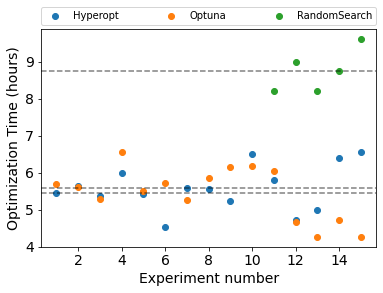

In [35]:
# train time on 300 trials
#plt.plot(figsize=(18,12))
#plt.plot((result[result['Algorithm']=='Catboost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']),'o')
result[result['Algorithm']=='Catboost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'].plot(marker="o", linestyle="")
for l in np.mean(result[result['Algorithm']=='Catboost'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']):
    plt.axhline(l, color = 'k', linestyle = '--', alpha = 0.5)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
#plt.title('Total optimization time taken by each optimization on 300 trial', size = 16)
plt.xlabel('Experiment number', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Optimization Time (hours)' , size=14)
plt.savefig("ctb_optim_time_n.png")
plt.show()

## LGBM

In [51]:
Lgbm_meantime = np.mean(result[result['Algorithm']=='LGBM'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'])
Lgbm_meantime

optim_type
Hyperopt        12.005333
Optuna           2.557333
RandomSearch     1.982000
dtype: float64

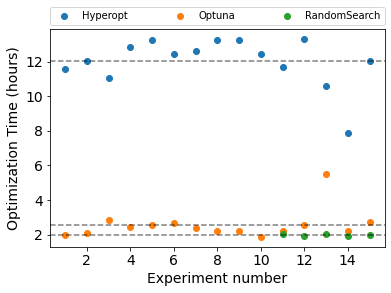

In [34]:
# train time on 300 trials
#plt.plot(figsize=(18,12))
#plt.plot((result[result['Algorithm']=='LGBM'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']),'o')
result[result['Algorithm']=='LGBM'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)'].plot(marker="o", linestyle="")
for l in np.mean(result[result['Algorithm']=='LGBM'].groupby(['Seed','optim_type']).sum().unstack()['Opt_time(hr)']):
    plt.axhline(l, color = 'k', linestyle = '--', alpha = 0.5)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=3, mode="expand", borderaxespad=0.)
#plt.title('Total optimization time taken by each optimization on 300 trial', size = 16)
plt.xlabel('Experiment number', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.ylabel('Optimization Time (hours)' , size=14)
plt.savefig("lgb_optim_time_n.png")
plt.show()

# Minimum loss achieved by each optimization

## XGBoost

In [52]:
# load the file path for the resuls
file = glob.glob('/content/drive/My Drive/XGBoost_results/loss_csv_results/*/*')
print(file)

# adding experiment number using list comprehension
def process_frame(path):
    df = pd.read_csv(path)
    # extract  experiment number
    #df['experiment'] = int(re.search(r'xperiment(.*?)_xgb.csv', path).group(1))
    return df
# combine the dataframe
frames = [ process_frame(f) for f in file ]
result = pd.concat(frames)
result_x = result.reset_index().drop('index', axis = 1)
result_x

['/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_randomsearch/xgb_seed315_rs.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_randomsearch/xgb_seed345_rs.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_randomsearch/xgb_seed724_rs.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_randomsearch/xgb_seed727_rs.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_randomsearch/xgb_seed761_rs.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_hyperopt/xgb_seed263_hyp.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_hyperopt/xgb_seed727_hyp.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_hyperopt/xgb_seed992_hyp.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_hyperopt/xgb_seed108_hyp.csv', '/content/drive/My Drive/XGBoost_results/loss_csv_results/loss_csv_hyperopt/xgb_seed304_hyp.csv', '/co

,seed,loss,params,estimators,iteration,eval_time (seconds),optim_type
0,12,0.392949,"{'objective': 'binary:logistic', 'eval_metric'...",478,1,262.102565,random_search
1,12,0.189626,"{'objective': 'binary:logistic', 'eval_metric'...",397,2,269.214039,random_search
2,12,0.419366,"{'objective': 'binary:logistic', 'eval_metric'...",243,3,307.130615,random_search
3,12,0.325300,"{'objective': 'binary:logistic', 'eval_metric'...",245,4,285.358088,random_search
4,12,0.375578,"{'objective': 'binary:logistic', 'eval_metric'...",235,5,281.366911,random_search
...,...,...,...,...,...,...,...
10473,15,0.127944,"{'objective': 'binary:logistic', 'eval_metric'...",188,296,237.512489,optuna
10474,15,0.130281,"{'objective': 'binary:logistic', 'eval_metric'...",96,297,178.083100,optuna
10475,15,0.131928,"{'objective': 'binary:logistic', 'eval_metric'...",271,298,284.608426,optuna
10476,15,0.124731,"{'objective': 'binary:logistic', 'eval_metric'...",225,299,269.774715,optuna


In [54]:
Xgboost_mean_minloss =np.mean(result_x.groupby(['seed','optim_type']).min().unstack()['loss'])
Xgboost_mean_minloss

optim_type
hyperopt         0.120711
optuna           0.120337
random_search    0.171592
dtype: float64

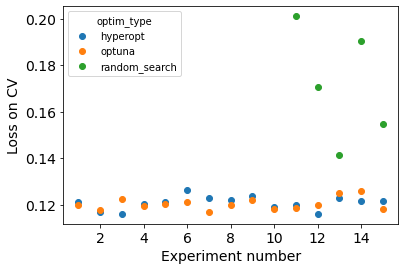

In [60]:

# Minimum Loss by each optimization technique
#plt.plot(figsize=(18,12))
#plt.plot(result_x.groupby(['seed','optim_type']).min().unstack()['loss'],'o')#.plot(figsize=(10,6))
result_x.groupby(['seed','optim_type']).min().unstack()['loss'].plot(marker="o", linestyle="")
#plt.title('Minimum loss achieved by each optimization on cross validation', size = 16)
plt.xlabel('Experiment number',size=14)
plt.ylabel('Loss on CV',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("xgb_optim_min_loss_n.png")
plt.show()

## LGBM

In [63]:
result_l = pd.read_csv('/content/drive/My Drive/Copy of experiment_results.csv')
result_l

,loss,params,iteration,estimators,train_time,optim_type,experiment
0,0.180614,"{'num_leaves': 719, 'lambda_l1': 0.30783648479...",1,50,15.564039,Optuna,2
1,0.188175,"{'num_leaves': 527, 'lambda_l1': 0.08286331528...",2,67,18.547801,Optuna,2
2,0.156591,"{'num_leaves': 415, 'lambda_l1': 0.45047722304...",3,103,23.859221,Optuna,2
3,0.170133,"{'num_leaves': 255, 'lambda_l1': 0.05689101229...",4,40,15.158652,Optuna,2
4,0.155895,"{'num_leaves': 751, 'lambda_l1': 0.01083743334...",5,20,12.884693,Optuna,2
...,...,...,...,...,...,...,...
10525,0.681676,"{'boosting_type': 'gbdt', 'feature_fraction': ...",297,1728,194.582987,Hyperopt,11
10526,0.718348,"{'boosting_type': 'goss', 'feature_fraction': ...",298,1212,156.006428,Hyperopt,11
10527,0.546014,"{'boosting_type': 'gbdt', 'feature_fraction': ...",299,1801,211.680169,Hyperopt,11
10528,0.608919,"{'boosting_type': 'goss', 'feature_fraction': ...",300,1285,187.434871,Hyperopt,11


In [64]:
Lgbm_mean_minloss =np.mean(result_l.groupby(['experiment','optim_type']).min().unstack()['loss'])
Lgbm_mean_minloss

optim_type
Hyperopt    0.298206
Optuna      0.120501
Random      0.127161
dtype: float64

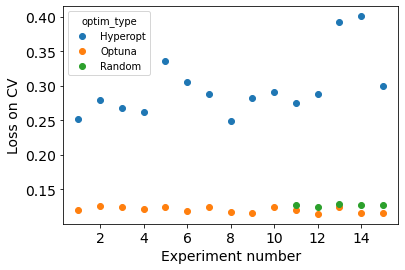

In [61]:

# Minimum Loss by each optimization technique
#plt.figure( figsize=(12,8))
#plt.plot(figsize=(18,12))
#plt.plot(result_l.groupby(['experiment','optim_type']).min().unstack()['loss'],'o')#.plot(figsize=(10,6))
result_l.groupby(['experiment','optim_type']).min().unstack()['loss'].plot(marker="o", linestyle="")
#plt.title('Minimum loss achieved by each optimization on cross validation', size = 12)
plt.xlabel('Experiment number',size=14)
plt.ylabel('Loss on CV',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("lgb_optim_min_loss_n.png")
plt.show()

## Catboost

In [65]:
result_c = pd.read_csv('/content/drive/My Drive/XGBoost_results/pickles.csv')
result_c

,loss,params,iteration,estimators,train_time,optim_type,experiment
0,0.080909,"{'l2_leaf_reg': 339322177.189533, 'learning_ra...",0,57,66.677801,Random,2
1,0.069054,"{'l2_leaf_reg': 5689.866029018299, 'learning_r...",1,21,29.361728,Random,2
2,0.067689,"{'l2_leaf_reg': 4941713.361323838, 'learning_r...",2,3352,2623.656797,Random,2
3,0.069885,"{'l2_leaf_reg': 339322177.189533, 'learning_ra...",3,76,88.394385,Random,2
4,0.074929,"{'l2_leaf_reg': 2811768697.9742365, 'learning_...",4,140,107.983188,Random,2
...,...,...,...,...,...,...,...
10495,0.067073,"{'bootstrap_type': 'Bernoulli', 'border_count'...",295,18,36.354813,Hyperopt,14
10496,0.058356,"{'bootstrap_type': 'Bayesian', 'border_count':...",296,157,107.450278,Hyperopt,14
10497,0.058329,"{'bootstrap_type': 'Bernoulli', 'border_count'...",297,22,50.680482,Hyperopt,14
10498,0.071497,"{'bootstrap_type': 'Bernoulli', 'border_count'...",298,40,67.966487,Hyperopt,14


In [66]:
ctb_mean_minloss =np.mean(result_c.groupby(['experiment','optim_type']).min().unstack()['loss'])
ctb_mean_minloss

optim_type
Hyperopt    0.051713
Optuna      0.050703
Random      0.054247
dtype: float64

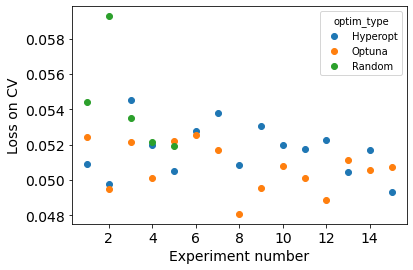

In [62]:

# Minimum Loss by each optimization technique
#plt.figure( figsize=(3.5,3))
#plt.plot(figsize=(18,12))
#plt.plot(result_c.groupby(['experiment','optim_type']).min().unstack()['loss'],'o')#.plot(figsize=(10,6))
result_c.groupby(['experiment','optim_type']).min().unstack()['loss'].plot(marker="o", linestyle="")
#plt.title('Minimum loss achieved by each optimization on cross validation', size = 12)
plt.xlabel('Experiment number',size=14)
plt.ylabel('Loss on CV',size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig("ctb_optim_min_loss_n.png")
plt.show()

# Loss distribution






## XGBoost

In [ ]:
result_xgb = result_x[['iteration','optim_type','loss','seed']].drop_duplicates(keep = 'first')

In [ ]:
loss_xgb = result_xgb.set_index(['iteration','seed','optim_type']).unstack().unstack().dropna(axis=1, how='all')
loss_xgb.head(10)

loss                      ...                                  
optim_type  hyperopt                      ... random_search                    
seed              1         2         3   ...            13        14        15
iteration                                 ...                                  
1           0.131753  0.290824  0.142494  ...      0.389156  0.449311  0.452297
2           0.164423  0.131007  0.155956  ...      0.368704  0.315813  0.343688
3           0.129909  0.160039  0.148107  ...      0.456661  0.473380  0.175546
4           0.126908  0.135377  0.136388  ...      0.400651  0.331339  0.368799
5           0.224606  0.347159  0.158284  ...      0.383346  0.430500  0.400058
6           0.193977  0.222656  0.257971  ...      0.392937  0.483536  0.384506
7           0.179065  0.213959  0.142052  ...      0.231588  0.452312  0.385454
8           0.121784  0.136166  0.139975  ...      0.408146  0.418923  0.401675
9           0.128124  0.125128  0.145087  ...      0.505105  0.326983  0.499896
10          0.338171  0.135663  0.163493  ...      0.358412  0.224406  0.216935

[10 rows x 35 columns]

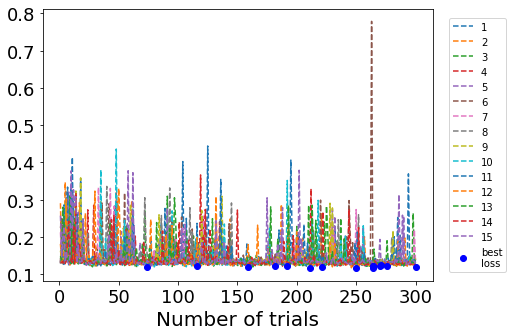

In [ ]:
#plt.figure(figsize=(18,12))

fig = loss_xgb['loss', 'hyperopt'].plot(figsize= (7,5), alpha = 1, style = "--")
#plt.plot(figsize=(18,12))
plt.plot(loss_xgb['loss', 'hyperopt'].idxmin(),loss_xgb['loss', 'hyperopt'].min(), 'o',label='best\nloss',markersize=6, color="blue")
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)

plt.savefig("xgb_hyperopt_loss_n.png", bbox_inches='tight')
plt.show()

In [ ]:
pd.concat([loss_xgb['loss', 'hyperopt'].idxmin(),loss_xgb['loss', 'hyperopt'].min()], axis=1)

,0,1
seed,,
1,300,0.121004
2,250,0.116644
3,211,0.115964
4,221,0.120392
5,264,0.121198
6,271,0.126274
7,116,0.122679
8,276,0.122037
9,192,0.123529


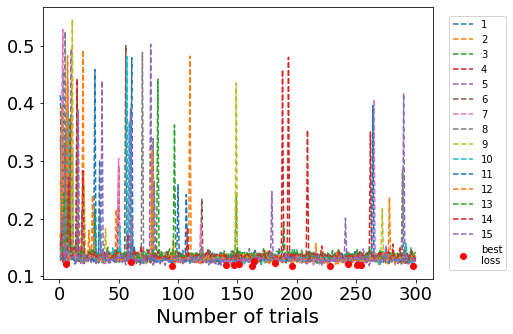

In [ ]:
#plt.figure(figsize= (20,8))
fig = loss_xgb['loss', 'optuna'].plot(figsize= (7,5), alpha = 1, style = "--")
plt.plot(loss_xgb['loss', 'optuna'][0:300].idxmin(),loss_xgb['loss', 'optuna'][0:300].min(), 'o',label='best\nloss', color = 'red',markersize=6)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.savefig("xgb_optuna_loss_n.png", bbox_inches='tight')
plt.show()

In [ ]:
result_loss = result_x[['iteration','optim_type','loss','seed','eval_time (seconds)']].drop_duplicates(keep = 'first')
result_loss = result_loss.set_index(['iteration','seed','optim_type']).unstack().unstack()[0:300]
result_loss = result_loss.dropna(axis=1, how='all')
result_loss.head()

loss                      ... eval_time (seconds)                        
optim_type  hyperopt                      ...       random_search                        
seed              1         2         3   ...                  13          14          15
iteration                                 ...                                            
1           0.131753  0.290824  0.142494  ...          394.785280  399.634731  463.828677
2           0.164423  0.131007  0.155956  ...          335.680966  167.587645  215.452840
3           0.129909  0.160039  0.148107  ...          124.735170  249.785968  475.306872
4           0.126908  0.135377  0.136388  ...          500.457476  614.867879  458.403777
5           0.224606  0.347159  0.158284  ...          140.084491  163.657570  373.939839

[5 rows x 70 columns]

In [ ]:
min_loss = result_loss['loss','hyperopt'].idxmin()
min_loss

seed
1     300
2     250
3     211
4     221
5     264
6     271
7     116
8     276
9     192
10     74
11    159
12    264
13    182
14    270
15    264
dtype: int64

In [ ]:
sum_low = []
for exp, lowest_time in zip(min_loss.index, min_loss.values):
    sum_low.append(result_loss['eval_time (seconds)','hyperopt',exp][:lowest_time].sum())
sum_low = [x / 3600 for x in sum_low]
sum_low

[16.93123394038611,
 13.870073706016667,
 13.453290253108333,
 14.209992931338888,
 13.385742474177778,
 19.84805415055556,
 6.587340248411111,
 16.602745140619444,
 8.906266041869443,
 4.151737844694445,
 9.740421210972224,
 23.744034205558332,
 13.915022314172221,
 10.961563677947222,
 18.51698529354722]

In [ ]:
min_loss_opt = result_loss['loss','optuna'].idxmin()
#min_loss_opt
sum_low_opt = []
for exp, lowest_time in zip(min_loss_opt.index, min_loss_opt.values):
    sum_low_opt.append(result_loss['eval_time (seconds)','optuna',exp][:lowest_time].sum())
sum_low_opt = [x / 3600 for x in sum_low_opt]
sum_low_opt

[9.976486788208334,
 16.885996063666664,
 7.424757512236112,
 7.844611892452777,
 10.702202792333333,
 19.784722595744444,
 5.438976917624999,
 9.352919502305555,
 0.32716279275277776,
 14.318528257144441,
 6.139125296469444,
 10.09064174763889,
 3.4622091112027773,
 11.308448867516663,
 17.959299009819443]

In [ ]:
# error
min_loss_rand = result_loss['loss','random_search'].idxmin()

sum_low_rand = []
for exp, lowest_time in zip(min_loss_rand.index, min_loss_rand.values):
    sum_low_rand.append(result_loss['eval_time (seconds)','random_search',exp][:lowest_time].sum())
sum_low_rand = [x / 3600 for x in sum_low_rand]
sum_low_rand

[15.99462200161111,
 7.082005040888889,
 7.374304871916666,
 18.406424933963887,
 4.326798837861111]

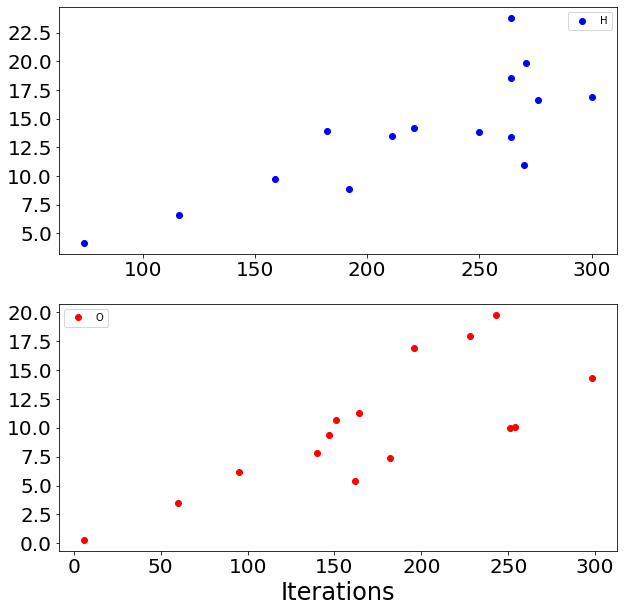

In [ ]:

fig,axs = plt.subplots(2,1, figsize = (10,10))
ax1 = plt.subplot(211)
ax1 = plt.plot(min_loss, sum_low, "bo", color = "blue")
#plt.suptitle("Time(hours) taken to achieve minimum loss \n for each experiment in Hyperopt and Optuna")
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend("Hyperopt")

ax2 = plt.subplot(212)
ax2 = plt.plot(min_loss_opt, sum_low_opt, "o", color = "red")
plt.legend("OPtuna", loc = "upper left")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Iterations', size = 24)
plt.savefig("time_vs_best_loss_xgb_n.png")

## LGBM

In [ ]:
result_lgb = result_l[['iteration','optim_type','loss','experiment']].drop_duplicates(keep = 'first')

In [ ]:
loss_lgb = result_lgb.set_index(['iteration','experiment','optim_type']).unstack().unstack().dropna(axis=1, how='all')
loss_lgb.head(10)

loss                      ...                              
optim_type  Hyperopt                      ...    Random                    
experiment        1         2         3   ...        13        14        15
iteration                                 ...                              
1           0.653478  0.415341  0.411215  ...  0.228274  0.142512  0.139621
2           0.653478  0.421041  0.401713  ...  0.155118  0.169261  0.240713
3           0.588204  0.708413  0.432778  ...  0.158482  0.247405  0.179531
4           0.604060  0.745257  0.364401  ...  0.149927  0.149537  0.158208
5           0.385042  0.696642  0.363315  ...  0.224187  0.148513  0.204559
6           0.393836  0.647248  0.333078  ...  0.151446  0.169456  0.170989
7           0.653478  0.446793  0.303741  ...  0.217100  0.234256  0.161864
8           0.588204  0.715347  0.795780  ...  0.277258  0.224114  0.188405
9           0.604060  0.724991  0.346450  ...  0.146132  0.214123  0.162874
10          0.396569  0.712999  0.521775  ...  0.196414  0.190066  0.148379

[10 rows x 35 columns]

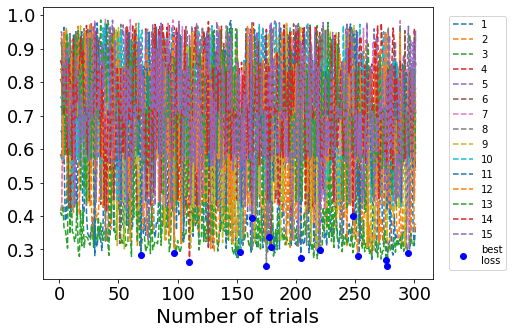

In [ ]:
#plt.figure(figsize=(18,12))

fig = loss_lgb['loss', 'Hyperopt'].plot(figsize= (7,5), alpha = 1, style = "--")
#plt.plot(figsize=(18,12))
plt.plot(loss_lgb['loss', 'Hyperopt'].idxmin(),loss_lgb['loss', 'Hyperopt'].min(), 'o',label='best\nloss',markersize=6, color="blue")
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)

plt.savefig("lgb_hyperopt_loss_n.png", bbox_inches='tight')
plt.show()

In [ ]:
pd.concat([loss_lgb['loss', 'Hyperopt'].idxmin(),loss_lgb['loss', 'Hyperopt'].min()], axis=1)

,0,1
experiment,,
1,277,0.251605
2,252,0.279740
3,276,0.267396
4,110,0.262929
5,177,0.336616
6,179,0.305679
7,295,0.288887
8,175,0.249007
9,69,0.283164


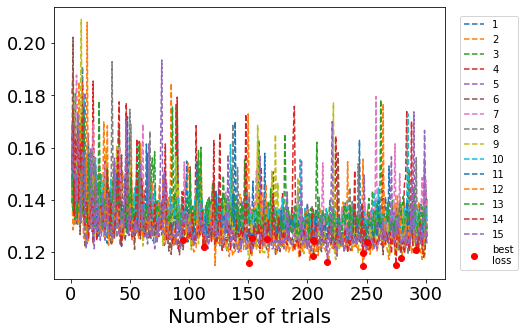

In [ ]:
#plt.figure(figsize= (20,8))
fig = loss_lgb['loss', 'Optuna'].plot(figsize= (7,5), alpha = 1, style = "--")
plt.plot(loss_lgb['loss', 'Optuna'][0:300].idxmin(),loss_lgb['loss', 'Optuna'][0:300].min(), 'o',label='best\nloss', color = 'red',markersize=6)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.savefig("lgb_optuna_loss_n.png", bbox_inches='tight')
plt.show()

In [ ]:
result_loss_lgb = result_l[['iteration','optim_type','loss','experiment','train_time']].drop_duplicates(keep = 'first')
result_loss_lgb = result_loss_lgb.set_index(['iteration','experiment','optim_type']).unstack().unstack()[0:300]
result_loss_lgb = result_loss_lgb.dropna(axis=1, how='all')
result_loss_lgb.head()

loss                      ... train_time                      
optim_type  Hyperopt                      ...     Random                      
experiment        1         2         3   ...         13         14         15
iteration                                 ...                                 
1           0.653478  0.415341  0.411215  ...  47.790769  17.554087  17.712785
2           0.653478  0.421041  0.401713  ...  17.029129  17.846643  51.623695
3           0.588204  0.708413  0.432778  ...  16.890422  44.833401  16.226867
4           0.604060  0.745257  0.364401  ...  16.732325  15.715571  15.918852
5           0.385042  0.696642  0.363315  ...  18.095236  16.316501  17.883646

[5 rows x 70 columns]

In [ ]:
min_loss = result_loss_lgb['loss','Hyperopt'].idxmin()
min_loss

experiment
1     277
2     252
3     276
4     110
5     177
6     179
7     295
8     175
9      69
10    153
11    204
12     97
13    163
14    248
15    220
dtype: int64

In [ ]:
sum_low = []
for exp, lowest_time in zip(min_loss.index, min_loss.values):
    sum_low.append(result_loss_lgb['train_time','Hyperopt',exp][:lowest_time].sum())
sum_low = [x / 3600 for x in sum_low]
sum_low

[13.071068287071654,
 6.172547603015276,
 9.85648621678778,
 4.3805145238738925,
 6.7218581055147295,
 7.540104332146944,
 13.864026352626954,
 7.543243598777228,
 2.5000421260002863,
 5.61130291911978,
 8.571084746226948,
 3.3135493767386084,
 6.536847991616653,
 8.916133082342583,
 8.583120280977115]

In [ ]:
min_loss_opt = result_loss_lgb['loss','Optuna'].idxmin()
#min_loss_opt
sum_low_opt = []
for exp, lowest_time in zip(min_loss_opt.index, min_loss_opt.values):
    sum_low_opt.append(result_loss_lgb['train_time','Optuna',exp][:lowest_time].sum())
sum_low_opt = [x / 3600 for x in sum_low_opt]
sum_low_opt

[1.6081649131963898,
 1.1408880141972233,
 1.1225505228338883,
 0.8765891808633332,
 1.352376643629165,
 1.7323808817741702,
 1.4071382988608234,
 2.39138035517442,
 1.1703663077686117,
 0.5623199244991665,
 1.7780265290227868,
 1.7883938040719618,
 2.002716762204145,
 2.375604399943356,
 1.6577043282952744]

In [ ]:
# error
min_loss_rand = result_loss_lgb['loss','Random'].idxmin()

sum_low_rand = []
for exp, lowest_time in zip(min_loss_rand.index, min_loss_rand.values):
    sum_low_rand.append(result_loss_lgb['train_time','Random',exp][:lowest_time].sum())
sum_low_rand = [x / 3600 for x in sum_low_rand]
sum_low_rand

[0.058378687108333306,
 0.8935227276724992,
 1.648591101687778,
 1.373707050761664,
 1.0105048389916838]

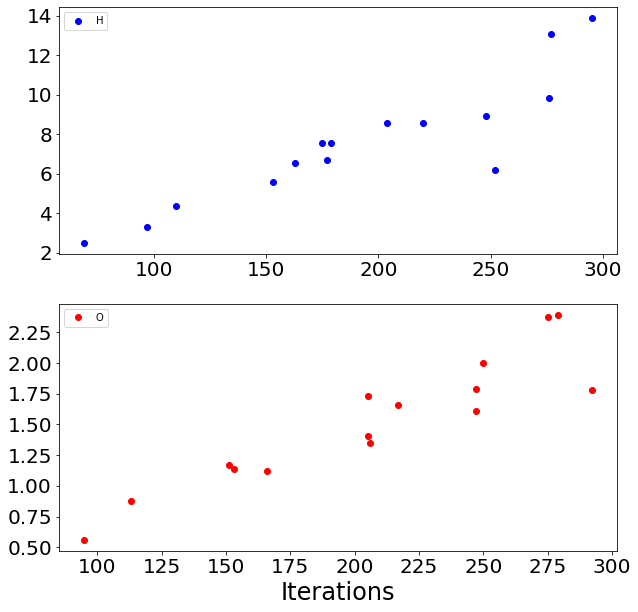

In [ ]:

fig,axs = plt.subplots(2,1, figsize = (10,10))
ax1 = plt.subplot(211)
ax1 = plt.plot(min_loss, sum_low, "bo", color = "blue")
#plt.suptitle("Time(hours) taken to achieve minimum loss \n for each experiment in Hyperopt and Optuna")
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend("Hyperopt")

ax2 = plt.subplot(212)
ax2 = plt.plot(min_loss_opt, sum_low_opt, "o", color = "red")
plt.legend("OPtuna", loc = "upper left")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Iterations', size = 24)
plt.savefig("time_vs_best_loss_lgb_n.png")

## Catboost

In [37]:
result_ctb = result_c[['iteration','optim_type','loss','experiment']].drop_duplicates(keep = 'first')

In [38]:
loss_ctb = result_ctb.set_index(['iteration','experiment','optim_type']).unstack().unstack().dropna(axis=1, how='all')
loss_ctb.head(10)

loss                      ...                              
optim_type  Hyperopt                      ...    Random                    
experiment         1         2         3  ...         3         4         5
iteration                                 ...                              
0           0.101613  0.082677  0.062204  ...  0.076422  0.070054  0.071376
1           0.087860  0.069180  0.072781  ...  0.059394  0.058057  0.079427
2           0.079987  0.061632  0.068978  ...  0.070356  0.072035  0.078240
3           0.064717  0.093618  0.065618  ...  0.073172  0.069848  0.054341
4           0.078768  0.068044  0.071268  ...  0.073679  0.072304  0.065209
5           0.067365  0.074617  0.064028  ...  0.075899  0.058718  0.057063
6           0.057135  0.071130  0.071519  ...  0.057017  0.070848  0.075823
7           0.061474  0.062594  0.068982  ...  0.080589  0.070846  0.074367
8           0.063404  0.085355  0.071138  ...  0.065361  0.073674  0.053989
9           0.075103  0.062085  0.082218  ...  0.069417  0.059515  0.069311

[10 rows x 35 columns]

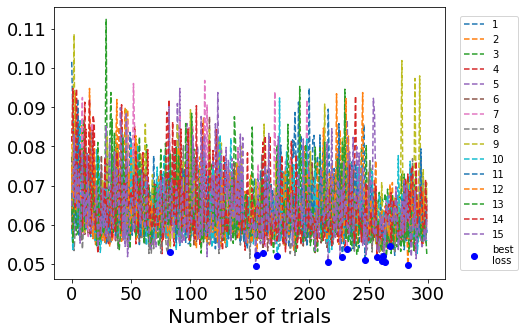

In [39]:
#plt.figure(figsize=(18,12))

fig = loss_ctb['loss', 'Hyperopt'].plot(figsize= (7,5), alpha = 1, style = "--")
#plt.plot(figsize=(18,12))
plt.plot(loss_ctb['loss', 'Hyperopt'].idxmin(),loss_ctb['loss', 'Hyperopt'].min(), 'o',label='best\nloss',markersize=6, color="blue")
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)

plt.savefig("ctb_hyperopt_loss_n.png", bbox_inches='tight')
plt.show()

In [40]:
pd.concat([loss_ctb['loss', 'Hyperopt'].idxmin(),loss_ctb['loss', 'Hyperopt'].min()], axis=1)

,0,1
experiment,,
1,247,0.050911
2,283,0.049785
3,268,0.054508
4,262,0.052000
5,216,0.050531
6,161,0.052780
7,232,0.053793
8,261,0.050853
9,83,0.053038


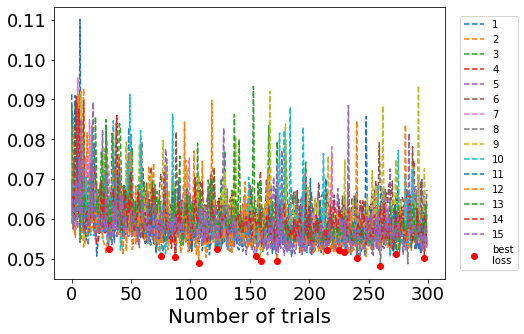

In [41]:
#plt.figure(figsize= (20,8))
fig = loss_ctb['loss', 'Optuna'].plot(figsize= (7,5), alpha = 1, style = "--")
plt.plot(loss_ctb['loss', 'Optuna'][0:300].idxmin(),loss_ctb['loss', 'Optuna'][0:300].min(), 'o',label='best\nloss', color = 'red',markersize=6)
plt.legend(loc='right', bbox_to_anchor=(1.2, 0.5), ncol=1)
plt.xlabel("Number of trials", size=20)
plt.xticks(size=18)
plt.yticks(size=18)
plt.savefig("ctb_optuna_loss_n.png", bbox_inches='tight')
plt.show()

In [42]:
result_loss_ctb = result_c[['iteration','optim_type','loss','experiment','train_time']].drop_duplicates(keep = 'first')
result_loss_ctb = result_loss_ctb.set_index(['iteration','experiment','optim_type']).unstack().unstack()[0:300]
result_loss_ctb = result_loss_ctb.dropna(axis=1, how='all')
result_loss_ctb.head()

loss                      ...  train_time                       
optim_type  Hyperopt                      ...      Random                       
experiment         1         2         3  ...           3           4          5
iteration                                 ...                                   
0           0.101613  0.082677  0.062204  ...   57.119052  118.171298  98.586522
1           0.087860  0.069180  0.072781  ...   29.022816   61.178699  66.353985
2           0.079987  0.061632  0.068978  ...  151.196313   85.785355  55.390964
3           0.064717  0.093618  0.065618  ...   66.659893   44.715434  54.225117
4           0.078768  0.068044  0.071268  ...   33.882141  410.862885  87.801537

[5 rows x 70 columns]

In [43]:
min_loss = result_loss_ctb['loss','Hyperopt'].idxmin()
min_loss

experiment
1     247
2     283
3     268
4     262
5     216
6     161
7     232
8     261
9      83
10    173
11    228
12    156
13    264
14    257
15    155
dtype: int64

In [44]:
sum_low = []
for exp, lowest_time in zip(min_loss.index, min_loss.values):
    sum_low.append(result_loss_ctb['train_time','Hyperopt',exp][:lowest_time].sum())
sum_low = [x / 3600 for x in sum_low]
sum_low

[5.073377657999999,
 5.402979453638888,
 4.747766721102778,
 5.304471676019445,
 3.777350449047223,
 2.9153980164166664,
 4.547799576130555,
 4.734017933952778,
 1.5635056380277779,
 3.755946652636111,
 4.3846339919111115,
 2.740386431522222,
 4.717999688,
 5.66417387475,
 2.6203229954972227]

In [45]:
min_loss_opt = result_loss_ctb['loss','Optuna'].idxmin()
#min_loss_opt
sum_low_opt = []
for exp, lowest_time in zip(min_loss_opt.index, min_loss_opt.values):
    sum_low_opt.append(result_loss_ctb['train_time','Optuna',exp][:lowest_time].sum())
sum_low_opt = [x / 3600 for x in sum_low_opt]
sum_low_opt

[2.5072828736111115,
 3.4647998155555553,
 3.9880144734916665,
 6.524710152408334,
 4.577338755833332,
 0.8059110619444443,
 4.126647307777778,
 4.890375367461111,
 3.5817187944444444,
 1.7185398525,
 4.883654170555555,
 1.9409814616666667,
 5.443296601111112,
 1.4686093416666666,
 2.094052972777778]

In [46]:
# error
min_loss_rand = result_loss_ctb['loss','Random'].idxmin()

sum_low_rand = []
for exp, lowest_time in zip(min_loss_rand.index, min_loss_rand.values):
    sum_low_rand.append(result_loss_ctb['train_time','Random',exp][:lowest_time].sum())
sum_low_rand = [x / 3600 for x in sum_low_rand]
sum_low_rand

[8.474476315413888,
 2.796232545411111,
 3.598534861594444,
 6.114304935422222,
 3.683607371302778]

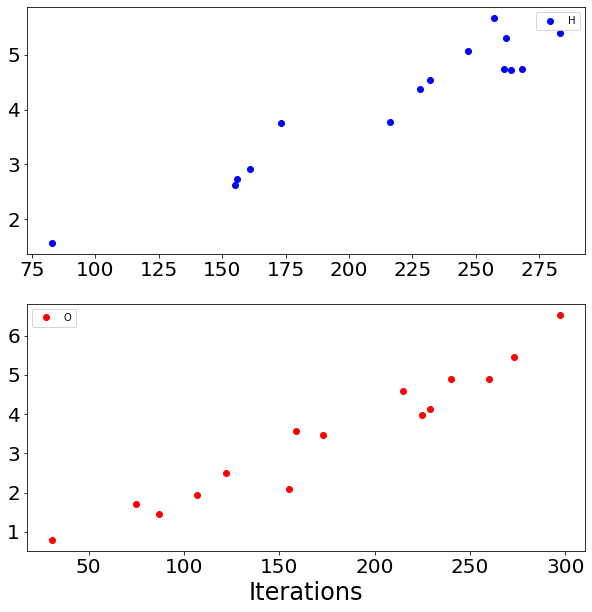

In [47]:

fig,axs = plt.subplots(2,1, figsize = (10,10))
ax1 = plt.subplot(211)
ax1 = plt.plot(min_loss, sum_low, "bo", color = "blue")
#plt.suptitle("Time(hours) taken to achieve minimum loss \n for each experiment in Hyperopt and Optuna")
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend("Hyperopt")

ax2 = plt.subplot(212)
ax2 = plt.plot(min_loss_opt, sum_low_opt, "o", color = "red")
plt.legend("OPtuna", loc = "upper left")
plt.xticks(size=20)
plt.yticks(size=20)
plt.xlabel('Iterations', size = 24)
plt.savefig("time_vs_best_loss_ctb_n.png")

# Comparing distribution of all 3 algorithms

## Hyperopt

In [5]:
import matplotlib.pyplot as plt
import gc
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
results = pd.read_csv('/content/drive/My Drive/XGBoost_results/Final-Hyperopt-workbook.csv')
results.head()

,Num,Seed,Algorithm,Opt_time(hr),train_time(sec),PR_AUC,ROC_AUC,Precision,Recall,F1-Score,best_F1-Score,Threshold,optim_type
0,727,1,XGBoost,16.93,23.74,0.73,0.96,0.255717,0.866197,0.394864,0.80899,0.980,Hyperopt
1,727,1,Catboost,5.45,2.49,0.65,0.96,0.075832,0.866197,0.139456,0.75486,0.880,Hyperopt
2,727,1,LGBM,11.57,9.24,0.74,0.94,0.606557,0.781690,0.683077,0.63291,0.999,Hyperopt
3,992,10,XGBoost,22.51,37.13,0.80,0.97,0.495902,0.852113,0.626943,0.81061,0.984,Hyperopt
4,992,10,Catboost,6.51,5.72,0.67,0.96,0.085374,0.859155,0.155315,0.76265,0.963,Hyperopt


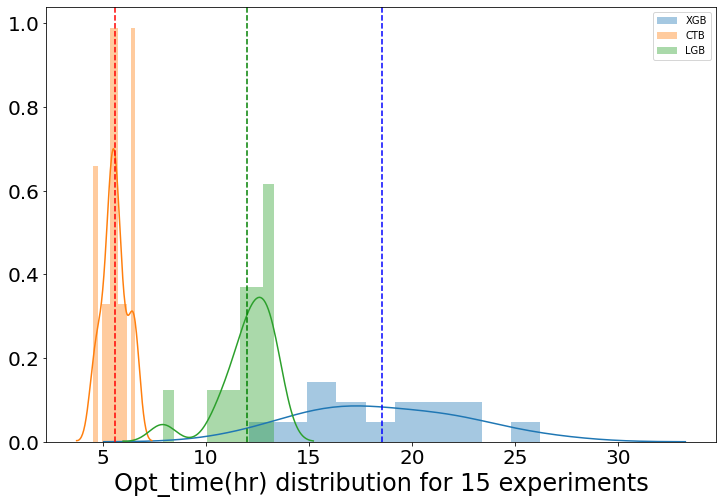

T-test distribution between Catboost and XGBoost for Opt_time(hr) is: 
 t = 12.966404663185449
 p = 2.3454290395982475e-13
T-test distribution between LightGBM and Catboost for Opt_time(hr) is: 
 t = -16.243060972582043
 p = 8.772219673376335e-16
T-test distribution between LightGBM and XGBoost for Opt_time(hr) is: 
 t = 6.22209752414731
 p = 1.0088985607549307e-06



****************************************************************************************************


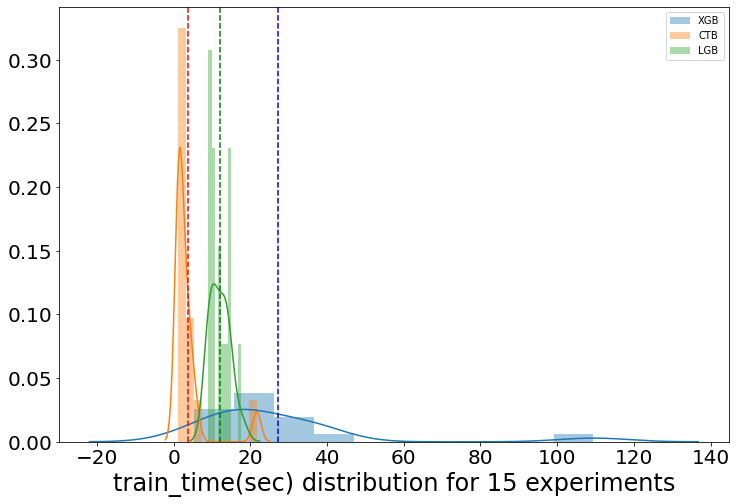

T-test distribution between Catboost and XGBoost for train_time(sec) is: 
 t = 3.5783452895764207
 p = 0.001285098620854359
T-test distribution between LightGBM and Catboost for train_time(sec) is: 
 t = -5.617209424798985
 p = 5.151214734872173e-06
T-test distribution between LightGBM and XGBoost for train_time(sec) is: 
 t = 2.3476490823327683
 p = 0.026189893296115818



****************************************************************************************************


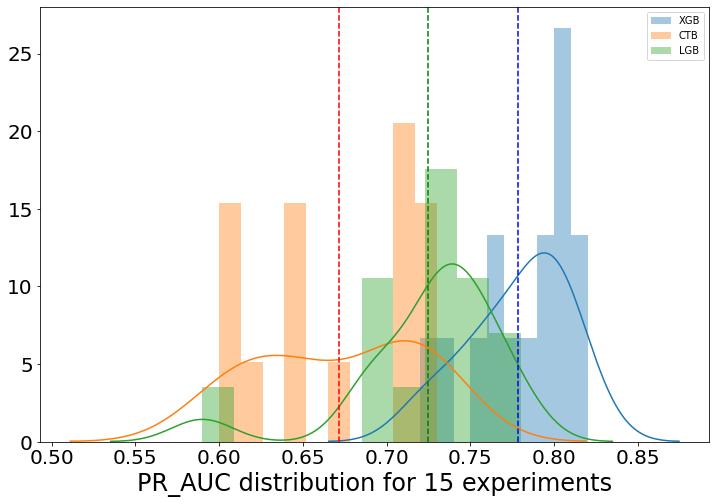

T-test distribution between Catboost and XGBoost for PR_AUC is: 
 t = 7.369476837985791
 p = 5.0294534238578124e-08
T-test distribution between LightGBM and Catboost for PR_AUC is: 
 t = -3.1102952455983313
 p = 0.004268245080889975
T-test distribution between LightGBM and XGBoost for PR_AUC is: 
 t = 3.839152064596594
 p = 0.000645708151110881



****************************************************************************************************


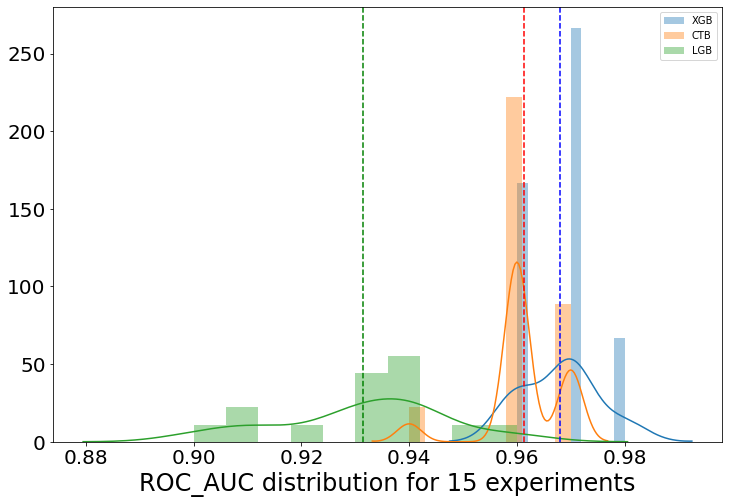

T-test distribution between Catboost and XGBoost for ROC_AUC is: 
 t = 2.5697808437501624
 p = 0.015789382955731613
T-test distribution between LightGBM and Catboost for ROC_AUC is: 
 t = 6.594057559047087
 p = 3.7585852279431014e-07
T-test distribution between LightGBM and XGBoost for ROC_AUC is: 
 t = 8.185932669579401
 p = 6.544990175944411e-09



****************************************************************************************************


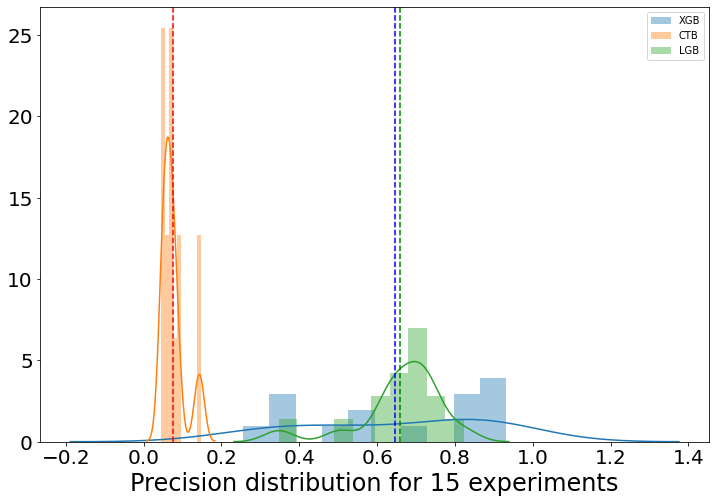

T-test distribution between Catboost and XGBoost for Precision is: 
 t = 9.133724101477563
 p = 6.839885160936333e-10
T-test distribution between LightGBM and Catboost for Precision is: 
 t = -19.26450658041918
 p = 1.0812793452742307e-17
T-test distribution between LightGBM and XGBoost for Precision is: 
 t = -0.19566708793571355
 p = 0.8462838119716071



****************************************************************************************************


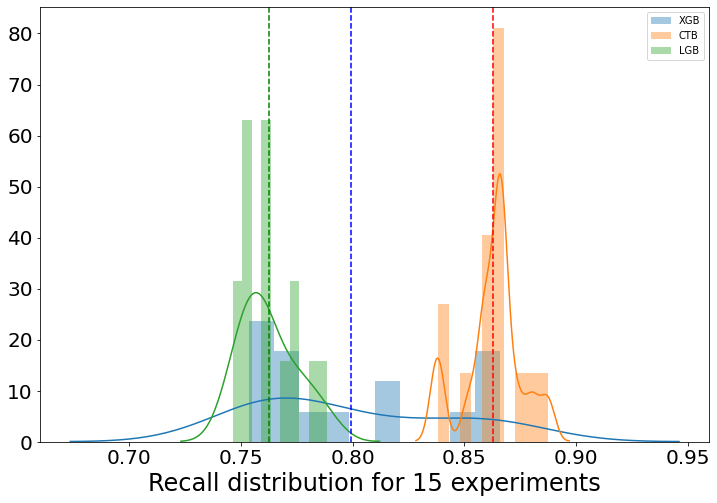

T-test distribution between Catboost and XGBoost for Recall is: 
 t = -5.4675635246343
 p = 7.738072276464757e-06
T-test distribution between LightGBM and Catboost for Recall is: 
 t = 21.24876142685506
 p = 8.235741816902751e-19
T-test distribution between LightGBM and XGBoost for Recall is: 
 t = 3.148922986892974
 p = 0.003873612658915967



****************************************************************************************************


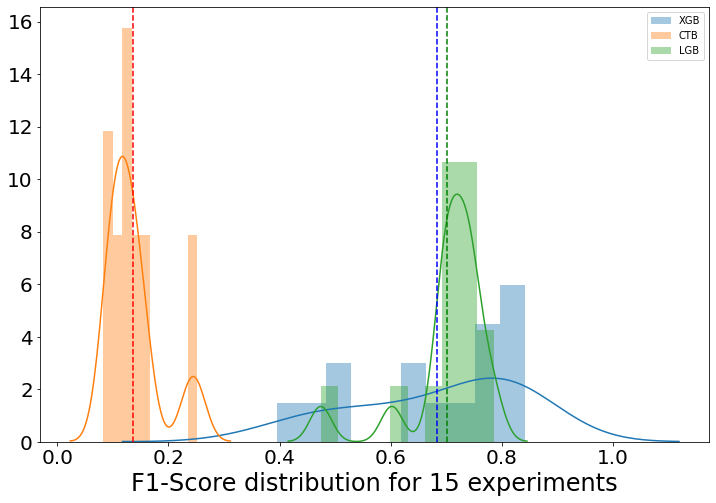

T-test distribution between Catboost and XGBoost for F1-Score is: 
 t = 13.404103230579638
 p = 1.0487791974785664e-13
T-test distribution between LightGBM and Catboost for F1-Score is: 
 t = -24.230858386137957
 p = 2.5034786624310195e-20
T-test distribution between LightGBM and XGBoost for F1-Score is: 
 t = -0.43234554461028907
 p = 0.668801915186646



****************************************************************************************************


In [ ]:
def distribution(col):
    for feature in col:
        if results[feature].dtypes == 'float64':
            x = results[results['Algorithm']=='XGBoost'][feature]
            l = results[results['Algorithm']=='LGBM'][feature]
            c = results[results['Algorithm']=='Catboost'][feature]
            plt.figure(figsize = (12,8))
            sns.distplot(x, bins = 10, label = "XGB")
            sns.distplot(c, bins = 10, label = "CTB")
            sns.distplot(l, bins = 10, label = "LGB")
            #plt.title("Comparative distribution of {} for hyperopt optimization for 3 algorithms".format(feature), size = 20)
            plt.legend()
            plt.axvline(x = np.mean(x), color = 'blue', alpha = 1, linestyle = '--')
            plt.axvline(x = np.mean(c), color = 'red', alpha = 1, linestyle = '--')
            plt.axvline(x = np.mean(l), color = 'green', alpha = 1, linestyle = '--')

            plt.xticks(size=20)
            plt.yticks(size=20)
            plt.xlabel(xlabel='{} distribution for 15 experiments'.format(feature), size = 24)
            plt.show()
            t_cx, p_cx = stats.ttest_ind(x,c)
            print("T-test distribution between Catboost and XGBoost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}".format(t_cx, p_cx))
            t_cx, p_cx = stats.ttest_ind(c,l)
            print("T-test distribution between LightGBM and Catboost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}".format(t_cx, p_cx))            
            t_cx, p_cx = stats.ttest_ind(x,l)
            print("T-test distribution between LightGBM and XGBoost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}\n\n\n".format(t_cx, p_cx))
            print('*'*100)
            gc.collect()           
distribution(['Opt_time(hr)', 'train_time(sec)', 'PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1-Score'])



## Optuna

In [6]:
results = pd.read_csv('/content/drive/My Drive/XGBoost_results/Final-optuna-workbook.csv')
results.head()

,Num,Seed,Algorithm,Opt_time(hr),train_time(sec),PR_AUC,ROC_AUC,Precision,Recall,F1-Score,best_F1-Score,Threshold,optim_type
0,47,1,XGBoost,11.86,2.45,0.67,0.97,0.466387,0.781690,0.584211,0.78788,0.844,Optuna
1,47,1,Catboost,5.69,1.31,0.66,0.96,0.077116,0.866197,0.141623,0.76404,0.922,Optuna
2,47,1,LGBM,1.98,1.38,0.81,0.97,0.938596,0.753521,0.835938,0.84252,0.594,Optuna
3,108,2,XGBoost,26.39,30.59,0.78,0.97,0.345609,0.859155,0.492929,0.81481,0.960,Optuna
4,108,2,Catboost,5.60,5.26,0.70,0.96,0.072490,0.859155,0.133699,0.76119,0.912,Optuna


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

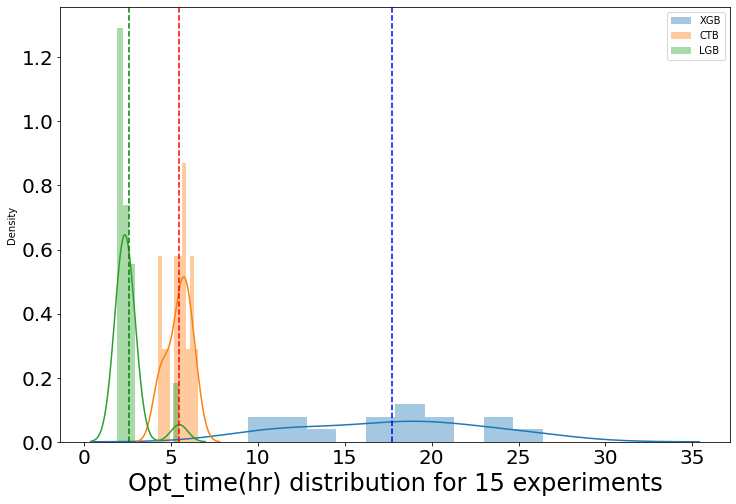

T-test distribution between Catboost and XGBoost for Opt_time(hr) is: 
 t = 9.125110502057993
 p = 6.978003209797652e-10
T-test distribution between LightGBM and Catboost for Opt_time(hr) is: 
 t = 10.108380279757123
 p = 7.582464782571304e-11
T-test distribution between LightGBM and XGBoost for Opt_time(hr) is: 
 t = 11.226223211170062
 p = 7.058317090130798e-12



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

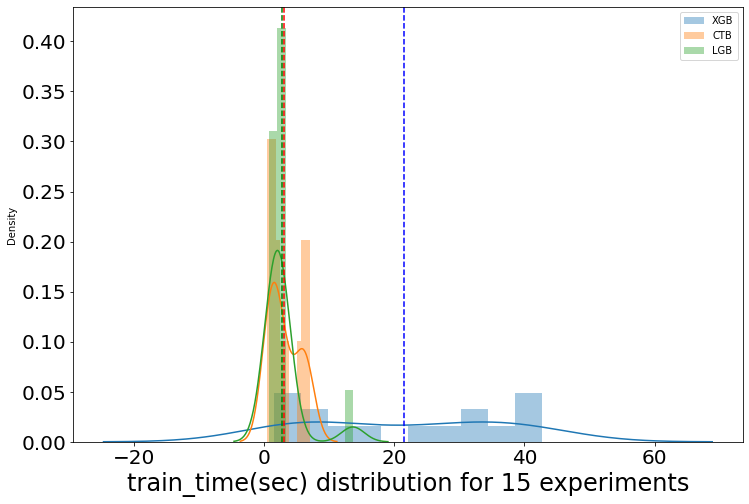

T-test distribution between Catboost and XGBoost for train_time(sec) is: 
 t = 4.6945190500393625
 p = 6.392064625540139e-05
T-test distribution between LightGBM and Catboost for train_time(sec) is: 
 t = 0.2973825761048378
 p = 0.7683696578656432
T-test distribution between LightGBM and XGBoost for train_time(sec) is: 
 t = 4.729993228342874
 p = 5.801784370443327e-05



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

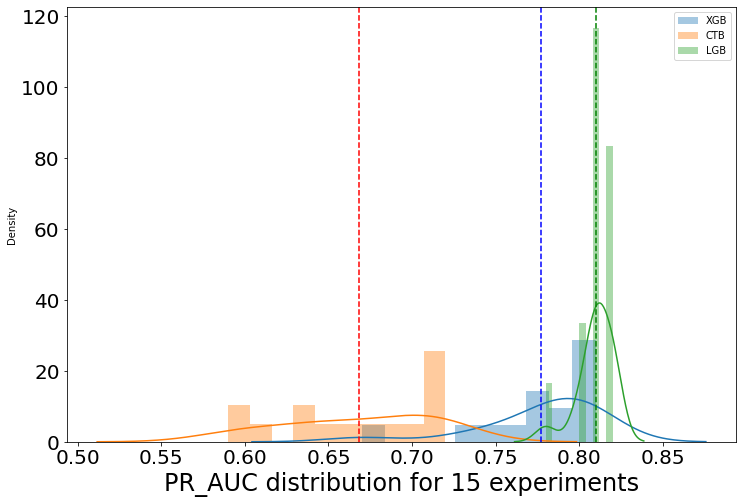

T-test distribution between Catboost and XGBoost for PR_AUC is: 
 t = 7.221697071136236
 p = 7.339629131663411e-08
T-test distribution between LightGBM and Catboost for PR_AUC is: 
 t = -11.912381195095547
 p = 1.770544257628149e-12
T-test distribution between LightGBM and XGBoost for PR_AUC is: 
 t = -3.228959377268432
 p = 0.0031641691087380707



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

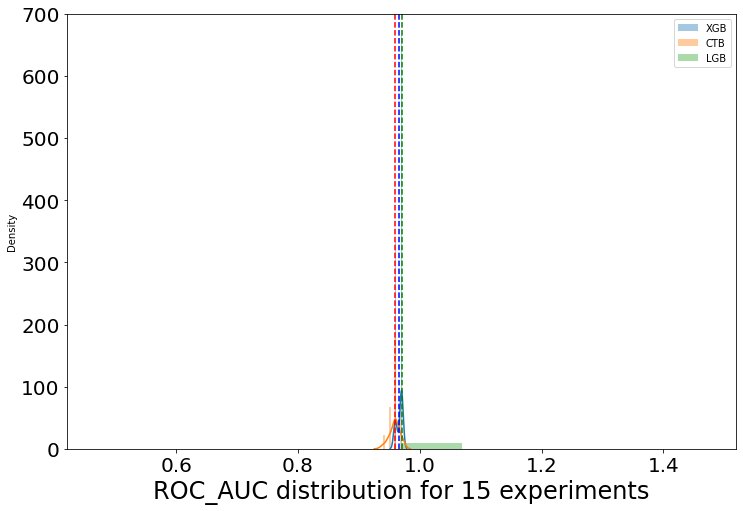

T-test distribution between Catboost and XGBoost for ROC_AUC is: 
 t = 3.207134902949226
 p = 0.0033441771351463666
T-test distribution between LightGBM and Catboost for ROC_AUC is: 
 t = -5.264250066925514
 p = 1.3470744971841751e-05
T-test distribution between LightGBM and XGBoost for ROC_AUC is: 
 t = -2.6457513110646493
 p = 0.013219223002708726



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

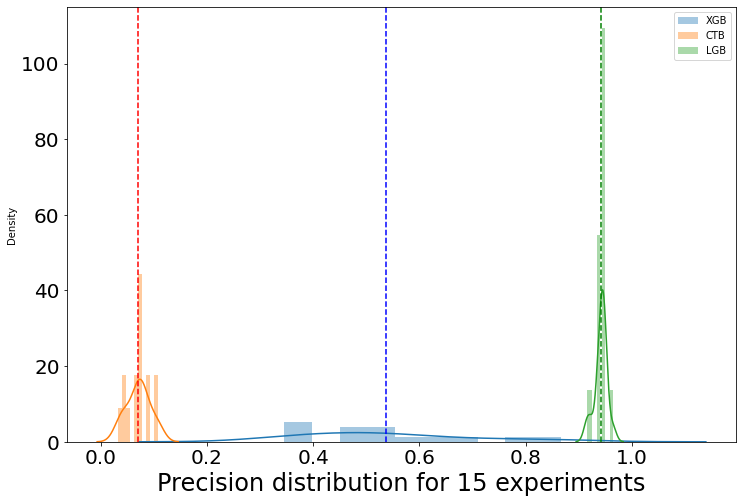

T-test distribution between Catboost and XGBoost for Precision is: 
 t = 11.431480252637689
 p = 4.640225124295476e-12
T-test distribution between LightGBM and Catboost for Precision is: 
 t = -135.03398559936414
 p = 5.932966349112021e-41
T-test distribution between LightGBM and XGBoost for Precision is: 
 t = -9.970984665098417
 p = 1.026205837206467e-10



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

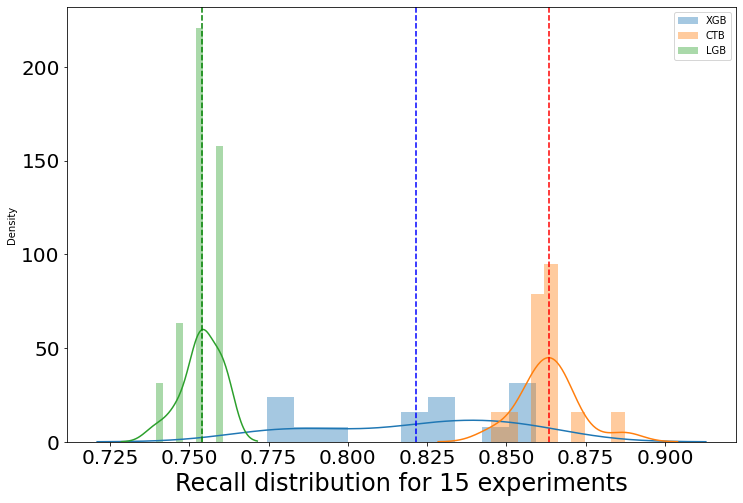

T-test distribution between Catboost and XGBoost for Recall is: 
 t = -5.023703463929962
 p = 2.599297322334407e-05
T-test distribution between LightGBM and Catboost for Recall is: 
 t = 37.24171432846418
 p = 2.130050906305971e-25
T-test distribution between LightGBM and XGBoost for Recall is: 
 t = 8.339697268380931
 p = 4.5007851980503835e-09



****************************************************************************************************


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

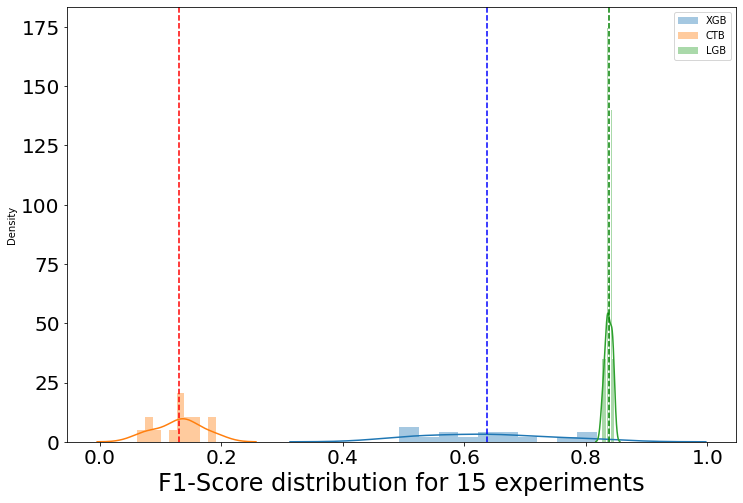

T-test distribution between Catboost and XGBoost for F1-Score is: 
 t = 17.860338901676478
 p = 7.713242981267014e-17
T-test distribution between LightGBM and Catboost for F1-Score is: 
 t = -71.35903457970078
 p = 3.205498888206266e-33
T-test distribution between LightGBM and XGBoost for F1-Score is: 
 t = -7.543278993140223
 p = 3.235480872222072e-08



****************************************************************************************************


In [7]:
def distribution(col):
    for feature in col:
        if results[feature].dtypes == 'float64':
            x = results[results['Algorithm']=='XGBoost'][feature]
            l = results[results['Algorithm']=='LGBM'][feature]
            c = results[results['Algorithm']=='Catboost'][feature]
            plt.figure(figsize = (12,8))
            sns.distplot(x, bins = 10, label = "XGB")
            sns.distplot(c, bins = 10, label = "CTB")
            sns.distplot(l, bins = 10, label = "LGB")
            #plt.title("Comparative distribution of {} for hyperopt optimization for 3 algorithms".format(feature), size = 20)
            plt.legend()
            plt.axvline(x = np.mean(x), color = 'blue', alpha = 1, linestyle = '--')
            plt.axvline(x = np.mean(c), color = 'red', alpha = 1, linestyle = '--')
            plt.axvline(x = np.mean(l), color = 'green', alpha = 1, linestyle = '--')

            plt.xticks(size=20)
            plt.yticks(size=20)
            plt.xlabel(xlabel='{} distribution for 15 experiments'.format(feature), size = 24)
            plt.show()
            t_cx, p_cx = stats.ttest_ind(x,c)
            print("T-test distribution between Catboost and XGBoost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}".format(t_cx, p_cx))
            t_cx, p_cx = stats.ttest_ind(c,l)
            print("T-test distribution between LightGBM and Catboost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}".format(t_cx, p_cx))            
            t_cx, p_cx = stats.ttest_ind(x,l)
            print("T-test distribution between LightGBM and XGBoost for {} is: ".format(feature)+
                  "\n t = {}\n p = {}\n\n\n".format(t_cx, p_cx))
            print('*'*100)
            gc.collect()           
distribution(['Opt_time(hr)', 'train_time(sec)', 'PR_AUC', 'ROC_AUC', 'Precision', 'Recall', 'F1-Score'])

# Shap Analysis

In [ ]:
new_list=[]
import csv
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
#myfile=glob('/content/drive/My Drive/XGBoost_results/Shap_files/xgbshap/optuna*')
#myfile=glob('/content/drive/My Drive/XGBoost_results/Shap_files/xgbshap/hyperopt*')
myfile=glob('/content/drive/My Drive/XGBoost_results/Shap_files/ctbshap/Random*')
print(len(myfile))
for i in myfile:
    with open(i,'r') as csv_file:
        reader = csv.reader(csv_file, delimiter=',')
        for row in reader:
            if row[0]!='':
                new_list.append(row[1])
new =[float(i) for i in new_list]
new_mean = ([sum(new[i::30])/len(myfile) for i in range(len(new) // len(myfile))])
variance_group = ([new[i::30] for i in range(len(new) // len(myfile))])
new_variance=[]
for i in variance_group:
    new_variance.append(np.var(i))

from re import search

if 'tuna' in myfile[0]:
    hyper_title="Optuna"
elif 'opt' in myfile[0]:
    hyper_title="Hyperopt"
else:
    hyper_title="Random Search"
    
if 'ctb' in myfile[0]:
    algo_name="CatbBoost"
elif 'lgb' in myfile[0]:
    algo_name="LightGBM"
else:
    algo_name="XGBoost"
    
print(hyper_title,algo_name)


5
Random Search CatbBoost


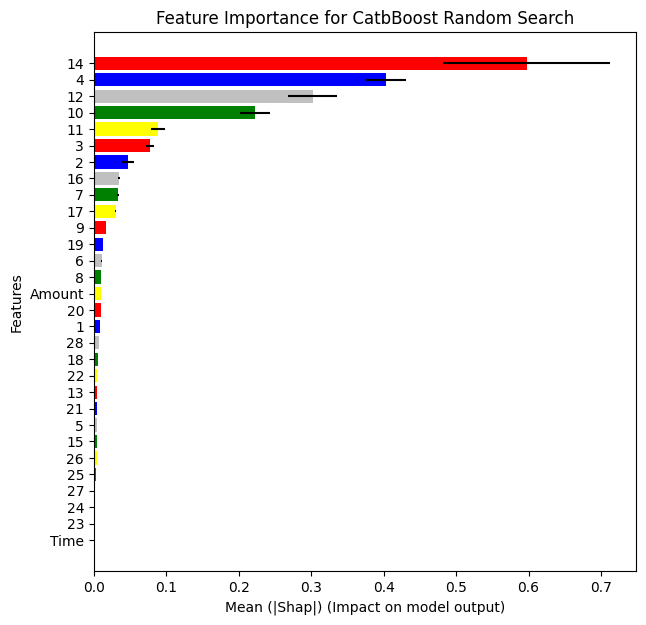

In [ ]:
bars = ('Time', '1', '2', '3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','Amount')
y_pos = np.arange(len(bars))
performance = new_mean

df = pd.DataFrame({"Features":bars,
                  "Shap_Absolute_Values":performance,
                     "Shap_variance":new_variance})
df = df.sort_values(by=['Shap_Absolute_Values'], ascending=False)

plt.rcdefaults()

fig, ax = plt.subplots(figsize = (7,7))
#plt.plot(figsize= (5,5))
ax.barh(y_pos, df['Shap_Absolute_Values'], xerr=df['Shap_variance'], align='center', color=['red','blue','silver','green','yellow'])
ax.set_yticks(y_pos)
ax.set_yticklabels(df['Features'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Mean (|Shap|) (Impact on model output)')
ax.set_ylabel('Features')
ax.set_title('Feature Importance for '+algo_name+' '+ hyper_title)

plt.savefig('Feature Importance for'+algo_name+hyper_title+".png", bbox_inches='tight')

plt.show()

# Normality Test

In [ ]:
import rpy2
# automatic translation of pandas to R
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
# install R packages
%%R 
install.packages("pROC")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘plyr’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R 
install.packages("ggpubr")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.56.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 188501 bytes (184 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R
install.packages("fBasics")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/timeDate_3043.102.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 314656 bytes (307 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons

In [ ]:
import pandas as pd
results = pd.read_csv('/content/drive/My Drive/project_results/workbook_optuna.csv')
results

,num,seed,Algo,opt_time,train_time,PR_AUC,ROC_AUC,precision,recall,f1_score,best_f1_score,threshold
0,1,47,XGBoost,11.86,2.45,0.67,0.97,0.466387,0.781690,0.584211,0.78788,0.844
1,1,47,Catboost,5.69,1.31,0.66,0.96,0.077116,0.866197,0.141623,0.76404,0.922
2,1,47,LGBM,1.98,1.38,0.81,0.97,0.938596,0.753521,0.835938,0.84252,0.594
3,2,108,XGBoost,26.39,30.59,0.78,0.97,0.345609,0.859155,0.492929,0.81481,0.960
4,2,108,Catboost,5.60,5.26,0.70,0.96,0.072490,0.859155,0.133699,0.76119,0.912
5,2,108,LGBM,2.07,0.75,0.78,0.97,0.937500,0.739437,0.826772,0.83004,0.502
6,3,259,XGBoost,11.11,6.16,0.79,0.96,0.801418,0.795775,0.798587,0.83721,0.904
7,3,259,Catboost,5.29,7.06,0.64,0.96,0.068908,0.866197,0.127660,0.75781,0.966
8,3,259,LGBM,2.53,2.80,0.82,0.97,0.947368,0.760563,0.843750,0.84825,0.394
9,4,263,XGBoost,16.61,11.58,0.76,0.97,0.386885,0.830986,0.527964,0.80451,0.899


In [ ]:
# Convert Pandas dataframe to R dataframe
%%R -i results
head(results)
xgb <- results[results$Algo == "XGBoost",]
lgb <- results[results$Algo == "LGBM",]
ctb <- results[results$Algo == "Catboost",]
head(lgb)

   num seed Algo opt_time train_time PR_AUC ROC_AUC precision    recall
2    1   47 LGBM     1.98       1.38   0.81    0.97 0.9385965 0.7535211
5    2  108 LGBM     2.07       0.75   0.78    0.97 0.9375000 0.7394366
8    3  259 LGBM     2.53       2.80   0.82    0.97 0.9473684 0.7605634
11   4  263 LGBM     2.47       2.13   0.81    0.97 0.9469027 0.7535211
14   5  304 LGBM     2.53       2.44   0.82    0.97 0.9469027 0.7535211
17   6  315 LGBM     2.65       2.61   0.82    0.97 0.9473684 0.7605634
    f1_score best_f1_score threshold
2  0.8359375       0.84252     0.594
5  0.8267717       0.83004     0.502
8  0.8437500       0.84825     0.394
11 0.8392157       0.84615     0.302
14 0.8392157       0.84047     0.413
17 0.8437500       0.84496     0.340


ROC AUC Normality Test

R[write to console]: Loading required package: ggplot2



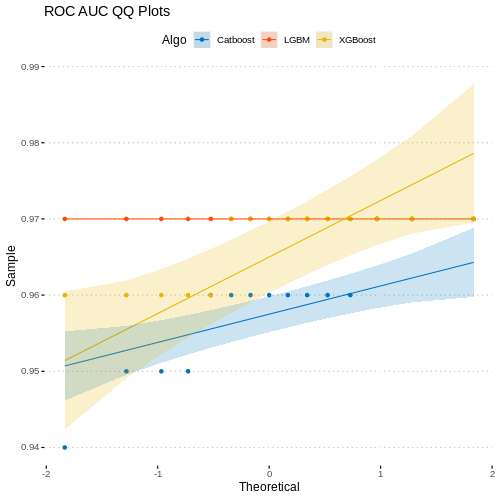

In [ ]:
%%R -w 500 -h 500
library("ggpubr")

ggqqplot(results, x = "ROC_AUC",
         title = "ROC AUC QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

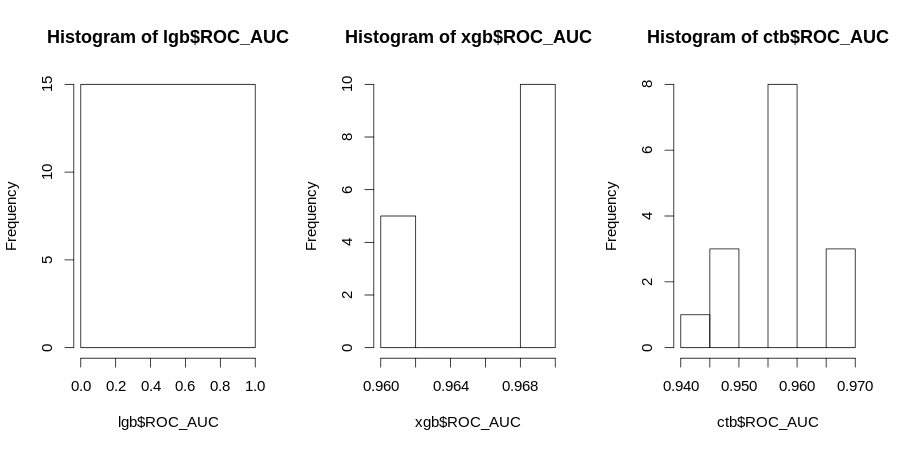

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(lgb$ROC_AUC)
hist(xgb$ROC_AUC) 
hist(ctb$ROC_AUC)

In [ ]:
%%R
library("timeDate")
library("timeSeries")
library("fBasics")

In [ ]:
%%R
print("XGB ROC Normality")
print(shapiroTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(shapiroTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(shapiroTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.6034
  P VALUE:
    2.738e-05 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "CTB ROC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.8596
  P VALUE:
    0.0238 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "LGB ROC Normality"


R[write to console]: Error in shapiro.test(x) : all 'x' values are identical
Calls: <Anonymous> ... withVisible -> print -> shapiroTest -> shapiro.test




Error in shapiro.test(x) : all 'x' values are identical
Calls: <Anonymous> ... withVisible -> print -> shapiroTest -> shapiro.test


As the p-value for xgb and ctb is less than 0.05, this implies data does not follow normal distribution

In [ ]:
%%R
print("XGB ROC Normality")
print(ksnormTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(ksnormTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(ksnormTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.8315
  P VALUE:
    Alternative Two-Sided: 1.966e-09 
    Alternative      Less: 9.83e-10 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "CTB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.8264
  P VALUE:
    Alternative Two-Sided: 2.531e-09 
    Alternative      Less: 1.266e-09 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 

[1] "LGB ROC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.834
  P VALUE:
    Alternative Two-Sided: 1.735e-09 
    Alternative      Less: 8.674e-10 
    Alternative   Greater: 0.4374 

Description:
 Thu Aug  6 14:45:32 2020 by user: 



In [ ]:
%%R
print("XGB ROC Normality")
print(adTest(xgb$ROC_AUC))
print("CTB ROC Normality")
print(adTest(ctb$ROC_AUC))
print("LGB ROC Normality")
print(adTest(lgb$ROC_AUC))

[1] "XGB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 2.9417
  P VALUE:
    8.114e-08 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.0673
  P VALUE:
    0.00585 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB ROC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: Inf
  P VALUE:
    < 2.2e-16 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



PR AUC Normality Test

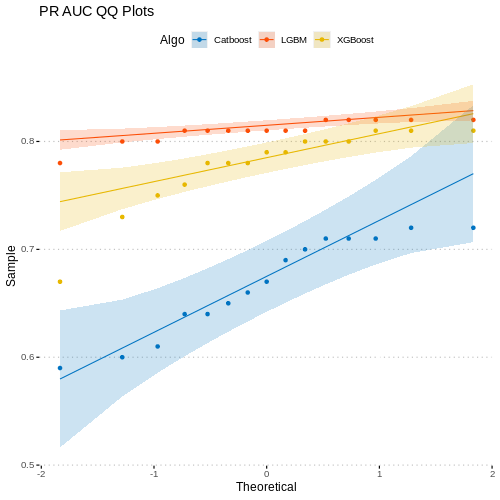

In [ ]:
%%R -w 500 -h 500
ggqqplot(results, x = "PR_AUC",
         title = "PR AUC QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

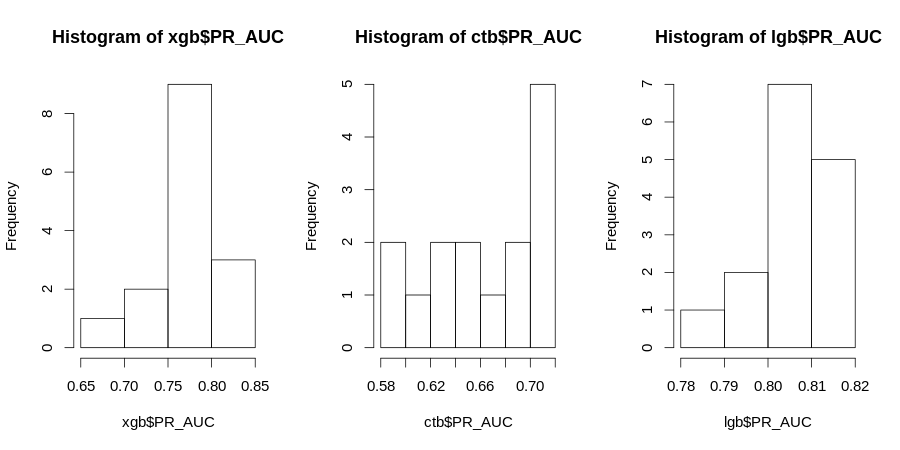

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$PR_AUC) 
hist(ctb$PR_AUC)
hist(lgb$PR_AUC)

In [ ]:
%%R
print("XGB PR AUC Normality")
print(ksnormTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(ksnormTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(ksnormTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7486
  P VALUE:
    Alternative Two-Sided: 1e-07 
    Alternative      Less: 5.002e-08 
    Alternative   Greater: 0.2698 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7224
  P VALUE:
    Alternative Two-Sided: 3.175e-07 
    Alternative      Less: 1.587e-07 
    Alternative   Greater: 0.1887 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7823
  P VALUE:
    Alternative Two-Sided: 2.125e-08 
    Alternative      Less: 1.063e-08 
    Alternative   Greater: 0.2796 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



In [ ]:
# Darling Normality Test
%%R
print("XGB PR AUC Normality")
print(adTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(adTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(adTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.0401
  P VALUE:
    0.00689 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.5048
  P VALUE:
    0.1708 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 1.2123
  P VALUE:
    0.002449 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



In [ ]:
%%R
print("XGB PR AUC Normality")
print(shapiroTest(xgb$PR_AUC))
print("CTB PR AUC Normality")
print(shapiroTest(ctb$PR_AUC))
print("LGB PR AUC Normality")
print(shapiroTest(lgb$PR_AUC))

[1] "XGB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.7972
  P VALUE:
    0.003381 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "CTB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9054
  P VALUE:
    0.1151 

Description:
 Thu Aug  6 14:45:33 2020 by user: 

[1] "LGB PR AUC Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.7846
  P VALUE:
    0.002346 

Description:
 Thu Aug  6 14:45:33 2020 by user: 



F1 Score Normality Test

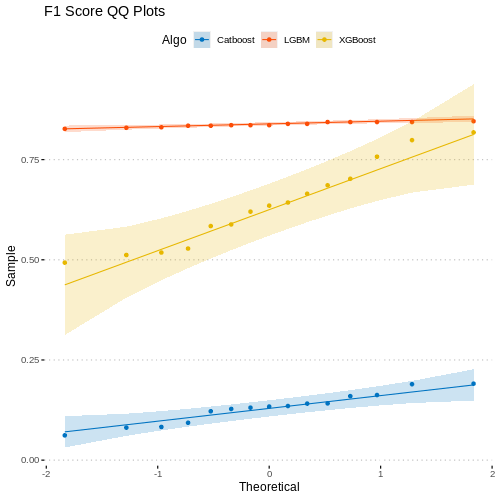

In [ ]:
%%R -w 500 -h 500
ggqqplot(results, x = "f1_score",
         title = "F1 Score QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

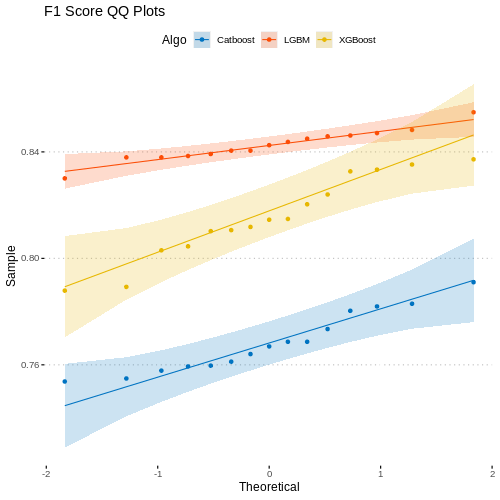

In [ ]:
# with best F1
%%R -w 500 -h 500
ggqqplot(results, x = "best_f1_score",
         title = "F1 Score QQ Plots",
         color = "Algo", 
         palette = c("#0073C2FF", "#FC4E07", "#E7B800"),
         ggtheme = theme_pubclean())

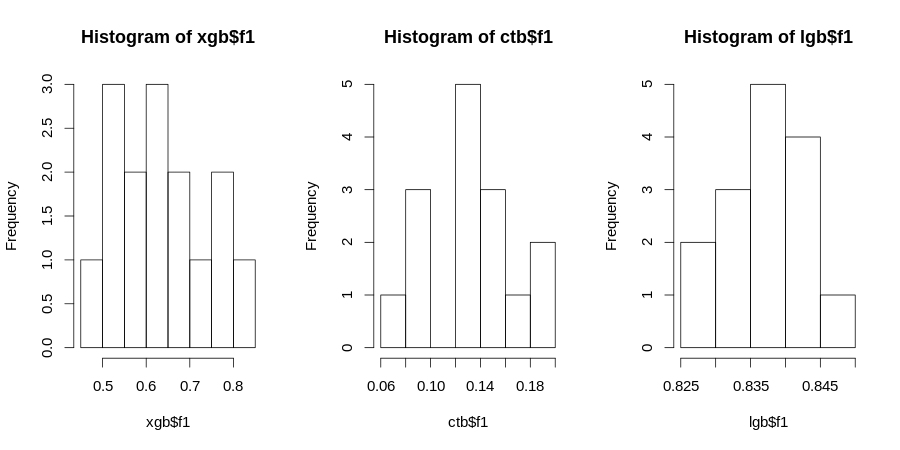

In [ ]:
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$f1) 
hist(ctb$f1)
hist(lgb$f1)

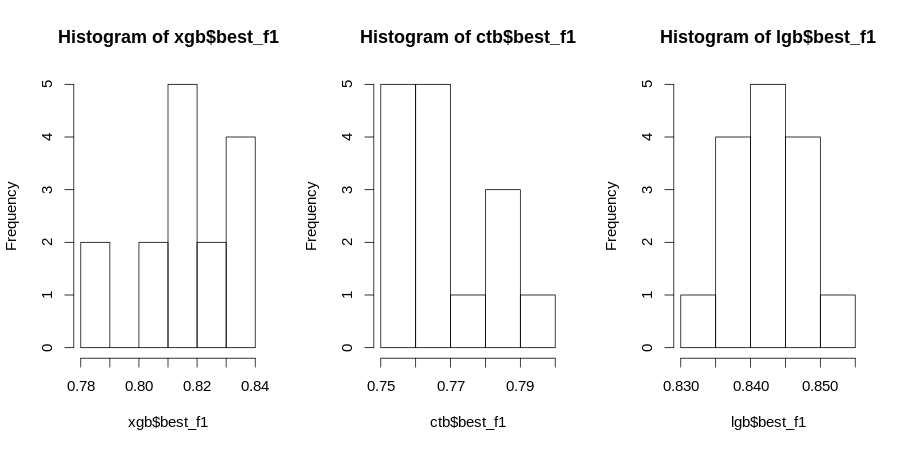

In [ ]:
# best F1
%%R -w 900 -h 450
par(mfrow = c(1,3), cex = 1.25)
hist(xgb$best_f1) 
hist(ctb$best_f1)
hist(lgb$best_f1)

In [ ]:
%%R
print("XGB F1 Normality")
print(ksnormTest(xgb$f1))
print("CTB F1 Normality")
print(ksnormTest(ctb$f1))
print("LGB F1 Normality")
print(ksnormTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.689
  P VALUE:
    Alternative Two-Sided: 1.28e-07 
    Alternative      Less: 6.399e-08 
    Alternative   Greater: 0.2433 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.5246
  P VALUE:
    Alternative Two-Sided: 0.0002262 
    Alternative      Less: 0.0001131 
    Alternative   Greater: 0.002879 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7958
  P VALUE:
    Alternative Two-Sided: 1.121e-08 
    Alternative      Less: 5.604e-09 
    Alternative   Greater: 0.3055 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best F1
%%R
print("XGB F1 Normality")
print(ksnormTest(xgb$best_f1))
print("CTB F1 Normality")
print(ksnormTest(ctb$best_f1))
print("LGB F1 Normality")
print(ksnormTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7846
  P VALUE:
    Alternative Two-Sided: 2.612e-10 
    Alternative      Less: 1.306e-10 
    Alternative   Greater: 0.2612 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7745
  P VALUE:
    Alternative Two-Sided: 3.061e-08 
    Alternative      Less: 1.53e-08 
    Alternative   Greater: 0.2516 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 One-sample Kolmogorov-Smirnov test

Test Results:
  STATISTIC:
    D: 0.7967
  P VALUE:
    Alternative Two-Sided: 1.072e-08 
    Alternative      Less: 5.362e-09 
    Alternative   Greater: 0.3147 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
%%R
print("XGB F1 Normality")
print(adTest(xgb$f1))
print("CTB F1 Normality")
print(adTest(ctb$f1))
print("LGB F1 Normality")
print(adTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.2365
  P VALUE:
    0.7424 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.3244
  P VALUE:
    0.4884 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.44
  P VALUE:
    0.2521 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best_f1
%%R
print("XGB F1 Normality")
print(adTest(xgb$best_f1))
print("CTB F1 Normality")
print(adTest(ctb$best_f1))
print("LGB F1 Normality")
print(adTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.3032
  P VALUE:
    0.53 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.397
  P VALUE:
    0.3238 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Anderson - Darling Normality Test

Test Results:
  STATISTIC:
    A: 0.275
  P VALUE:
    0.6079 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
%%R
print("XGB F1 Normality")
print(shapiroTest(xgb$f1))
print("CTB F1 Normality")
print(shapiroTest(ctb$f1))
print("LGB F1 Normality")
print(shapiroTest(lgb$f1))

[1] "XGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9512
  P VALUE:
    0.544 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9536
  P VALUE:
    0.5828 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.932
  P VALUE:
    0.292 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



In [ ]:
# with best_F1
%%R
print("XGB F1 Normality")
print(shapiroTest(xgb$best_f1))
print("CTB F1 Normality")
print(shapiroTest(ctb$best_f1))
print("LGB F1 Normality")
print(shapiroTest(lgb$best_f1))

[1] "XGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9427
  P VALUE:
    0.4177 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "CTB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9334
  P VALUE:
    0.307 

Description:
 Thu Aug  6 14:45:34 2020 by user: 

[1] "LGB F1 Normality"

Title:
 Shapiro - Wilk Normality Test

Test Results:
  STATISTIC:
    W: 0.9673
  P VALUE:
    0.8168 

Description:
 Thu Aug  6 14:45:34 2020 by user: 



Non-Parametric Test

In [ ]:
%%R
print(kruskal.test(ROC_AUC ~ Algo, data = results) )
print(kruskal.test(PR_AUC ~ Algo, data = results) )
print(kruskal.test(f1_score ~ Algo, data = results) )


	Kruskal-Wallis rank sum test

data:  ROC_AUC by Algo
Kruskal-Wallis chi-squared = 21.104, df = 2, p-value = 2.615e-05


	Kruskal-Wallis rank sum test

data:  PR_AUC by Algo
Kruskal-Wallis chi-squared = 33.805, df = 2, p-value = 4.565e-08


	Kruskal-Wallis rank sum test

data:  f1_score by Algo
Kruskal-Wallis chi-squared = 39.172, df = 2, p-value = 3.119e-09



In [ ]:
# with best_F1
%%R
print(kruskal.test(ROC_AUC ~ Algo, data = results) )
print(kruskal.test(PR_AUC ~ Algo, data = results) )
print(kruskal.test(best_f1_score ~ Algo, data = results) )


	Kruskal-Wallis rank sum test

data:  ROC_AUC by Algo
Kruskal-Wallis chi-squared = 21.104, df = 2, p-value = 2.615e-05


	Kruskal-Wallis rank sum test

data:  PR_AUC by Algo
Kruskal-Wallis chi-squared = 33.805, df = 2, p-value = 4.565e-08


	Kruskal-Wallis rank sum test

data:  best_f1_score by Algo
Kruskal-Wallis chi-squared = 38.104, df = 2, p-value = 5.32e-09



In [ ]:
%%R
rank(results$ROC.AUC)
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "two.sided"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "two.sided"))
print(wilcox.test(ctb$ROC, lgb$ROC, alternative = "two.sided"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.01749
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.004944
alternative hypothesis: true location shift is not equal to 0


	Wilcoxon rank sum test with continuity correction

data:  ctb$ROC and lgb$ROC
W = 22.5, p-value = 2.188e-05
alternative hypothesis: true location shift is not equal to 0



In [ ]:
%%R
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "less"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "less"))
print(wilcox.test(ctb$ROC, lgb$ROC, alternative = "less"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.008746
alternative hypothesis: true location shift is less than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.9979
alternative hypothesis: true location shift is less than 0


	Wilcoxon rank sum test with continuity correction

data:  ctb$ROC and lgb$ROC
W = 22.5, p-value = 1.094e-05
alternative hypothesis: true location shift is less than 0



In [ ]:
%%R
print(wilcox.test(xgb$ROC, lgb$ROC, alternative = "greater"))
print(wilcox.test(xgb$ROC, ctb$ROC, alternative = "greater"))
print(wilcox.test(lgb$ROC, ctb$ROC, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and lgb$ROC
W = 75, p-value = 0.9927
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$ROC and ctb$ROC
W = 175, p-value = 0.002472
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$ROC and ctb$ROC
W = 202.5, p-value = 1.094e-05
alternative hypothesis: true location shift is greater than 0



In [ ]:
%%R
print(wilcox.test(xgb$PR_AUC, lgb$PR_AUC, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$PR_AUC, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$PR_AUC, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$PR_AUC
W = 29, p-value = 0.9998
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$PR_AUC
W = 217.5, p-value = 6.991e-06
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$PR_AUC
W = 225, p-value = 1.372e-06
alternative hypothesis: true location shift is greater than 0



In [ ]:
%%R
print(wilcox.test(xgb$PR_AUC, lgb$f1, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$f1, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$f1, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$f1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$f1
W = 225, p-value = 1.641e-06
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$f1
W = 225, p-value = 1.394e-06
alternative hypothesis: true location shift is greater than 0



In [ ]:
# with best_F1
%%R
print(wilcox.test(xgb$PR_AUC, lgb$best_f1, alternative = "greater"))
print(wilcox.test(xgb$PR_AUC, ctb$best_f1, alternative = "greater"))
print(wilcox.test(lgb$PR_AUC, ctb$best_f1, alternative = "greater"))


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and lgb$best_f1
W = 0, p-value = 1
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  xgb$PR_AUC and ctb$best_f1
W = 156, p-value = 0.03702
alternative hypothesis: true location shift is greater than 0


	Wilcoxon rank sum test with continuity correction

data:  lgb$PR_AUC and ctb$best_f1
W = 221, p-value = 3.106e-06
alternative hypothesis: true location shift is greater than 0



Comparing min. median and max

In [ ]:
%%R
algo <- c("Catboost", "LGBM", "XGBoost")
cols <- c("PR_AUC", "ROC_AUC")

for (c in cols){
    cat("Experiment seeds for ",c,"\n")
    for (a in algo){
        df <- results[results$Algo == a,]
        cat("\t\t",a, "\n")
        cat("min seed : ", with(df, which.min(df[,c])), "\t")
        cat("median seed : ", with(df, which.min(abs(df[,c] - median(df[,c])))), "\t")
        cat("max seed : ", with(df, which.max(df[,c])), "\n\n")
    }
}

Experiment seeds for  PR_AUC 
		 Catboost 
min seed :  5 	median seed :  13 	max seed :  8 

		 LGBM 
min seed :  2 	median seed :  1 	max seed :  3 

		 XGBoost 
min seed :  1 	median seed :  3 	max seed :  8 

Experiment seeds for  ROC_AUC 
		 Catboost 
min seed :  15 	median seed :  1 	max seed :  5 

		 LGBM 
min seed :  1 	median seed :  1 	max seed :  1 

		 XGBoost 
min seed :  3 	median seed :  1 	max seed :  1 



Kappa Coefficient

In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np
x = results[results['Algo']=='XGBoost']['PR_AUC'].apply(lambda x: int(x*100))
l = results[results['Algo']=='LGBM']['PR_AUC'].apply(lambda x: int(x*100))
c = results[results['Algo']=='Catboost']['PR_AUC'].apply(lambda x: int(x*100))

print(cohen_kappa_score(x, l))
print(cohen_kappa_score(x, c))
print(cohen_kappa_score(c, l))

0.15384615384615385
-0.004464285714285587
0.0


In [ ]:
x

0     67
3     78
6     79
9     76
12    80
15    79
18    73
21    81
24    81
27    78
30    80
33    80
36    78
39    75
42    81
Name: PR_AUC, dtype: int64

# Moving Threshold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score
import pickle
import csv

In [ ]:
testdata=pd.read_csv('/content/drive/My Drive/project_results/test.csv')
testdata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
139330,83104.0,-1.684059,1.500809,0.759888,0.550576,0.232439,-0.043998,0.626440,-0.004514,-0.004855,1.376058,1.540308,0.693117,0.019787,0.130297,0.672786,-0.542340,-0.259041,0.050345,0.296603,0.252636,0.099876,0.702279,-0.194992,0.034693,-0.271951,-0.402507,-0.359649,-0.093177,19.45,0
86361,61199.0,-0.712760,0.946364,1.613294,-0.057937,0.307252,0.033698,0.842808,-0.082649,-0.286508,-0.691974,-1.424615,0.187289,0.729575,-0.393678,-0.360989,-0.210956,-0.257742,-0.347665,0.783205,0.043267,-0.209533,-0.489587,-0.374907,-0.405319,0.492170,0.339188,-0.107684,0.052013,31.35,0
94117,64741.0,1.194627,0.202019,0.148443,0.456065,-0.024289,-0.105957,-0.146632,0.140367,-0.109165,-0.137806,1.448209,0.552174,-0.475780,0.047778,0.741160,0.508925,-0.059739,-0.065391,-0.138696,-0.134548,-0.237956,-0.716717,0.114452,-0.366347,0.135195,0.129319,-0.014949,0.012339,0.89,0
123803,77071.0,1.191219,-0.686249,0.413138,0.261424,-0.634744,0.624022,-0.717510,0.123673,-0.737618,0.811951,-0.149693,0.699783,1.113520,-0.260753,-0.373348,-0.937595,-0.774998,2.225077,-0.413753,-0.297845,-0.214390,-0.138765,-0.283669,-0.835391,0.646958,-0.177545,0.063255,0.026668,83.50,0
126884,78136.0,0.807040,-1.845157,1.160044,-0.078988,-1.973917,0.492741,-1.211037,0.286344,0.606206,0.173870,-0.962828,-0.534526,-0.857532,-0.955275,-0.739601,0.405838,1.157364,-1.717754,0.532613,0.443070,0.253705,0.462592,-0.229476,0.129784,0.251871,-0.111874,0.038918,0.063682,250.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,44460.0,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,0.589107,2.308017,1.328085,0.716657,0.606381,0.976724,-2.534300,0.937891,-0.991656,-2.003473,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,279.90,0
274698,166166.0,2.027942,0.034329,-2.411462,0.160815,0.870687,-1.269340,0.984068,-0.611409,0.190407,-0.099633,-1.084891,0.559101,0.829303,0.679437,0.434459,-0.673921,-0.532389,-0.333971,0.210357,-0.069285,0.184379,0.603199,-0.225128,-0.659959,0.670756,-0.379132,-0.040148,-0.063864,70.00,0
269159,163558.0,2.030605,0.148455,-1.765004,0.556354,0.135904,-1.471860,0.228982,-0.333116,0.691840,-0.505593,-0.388708,-0.312587,-0.720657,-0.683783,1.034540,0.211524,0.573734,0.544761,-0.517835,-0.237780,0.192819,0.687191,-0.014358,-0.104785,0.211153,-0.096818,-0.004184,-0.029435,11.99,0
42212,40998.0,0.961080,-0.816486,1.540157,1.011783,-1.196358,1.353506,-1.253677,0.625705,1.655494,-0.363684,0.127790,1.105679,-0.845978,-0.795568,-1.888385,-0.442440,0.348403,-0.147016,0.444069,-0.079521,-0.015309,0.313640,-0.123588,-0.228378,0.305133,0.513930,0.053458,0.018343,59.50,0


In [ ]:
testlabel=testdata['Class']
testlabel

139330    0
86361     0
94117     0
123803    0
126884    0
         ..
50356     0
274698    0
269159    0
42212     0
36648     0
Name: Class, Length: 85118, dtype: int64

In [ ]:
#lgb proba optuna files
path = ['/content/drive/My Drive/project_results/predproba_lgb_optuna/Experiment1_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/Experiment2_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment3_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment4_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment5_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment6_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment7_preds.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment8_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment9_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment10_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment11_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment12_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment13_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment14_pred.p',
        '/content/drive/My Drive/project_results/predproba_lgb_optuna/experiment15_pred.p']

In [ ]:
#ctb proba optuna files
path = ['/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_47O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_108O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_259O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_263O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_304O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_315O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_345O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_524O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_647O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_724O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_727O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_761O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_789O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_920O.p',
            '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_992O.p']

In [ ]:
#xgb proba optuna files
path=['/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed47_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed108_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed259_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed263_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed304_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed315_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed345_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed524_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed647_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed724_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed727_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed761_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed789_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed920_predprob.p',
      '/content/drive/My Drive/project_results/proba_xgb_optuna/xgb_seed992_predprob.p']

In [ ]:
#lgb hyperopt proba files
path=['/content/drive/My Drive/project_results/predproba_lgb_hyperopt/Experiment1_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/Experiment2_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment3_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment4_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment5_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment6_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment7_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment8_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment9_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment10_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment11_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment12_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment13_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment14_pred.p',
      '/content/drive/My Drive/project_results/predproba_lgb_hyperopt/experiment15_pred.p']

In [ ]:
# xgb proba hyperopt files
path = ['/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed47_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed108_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed259_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed263_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed304_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed315_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed345_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed524_predprob.p',
        #'/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed647_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_randomseed_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed727_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed761_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed789_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed920_predprob.p',
        '/content/drive/My Drive/project_results/xgb_predproba_hyperopt/xgb_seed992_predprob.p']

In [ ]:
# ctb hyperopt proba files
path = ['/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_47H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_647H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_524H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_304H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_108H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_992H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_920H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_761H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_259H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_789H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_724H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_727H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_263H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_315H.p',
        '/content/drive/My Drive/project_results/ctb_Proba/ctb_proba_345H.p']

In [ ]:
# xgb random search proba files
path = ['/content/drive/My Drive/project_results/xgb_randomsearch_results/seed315/xgb_seed315_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed345/xgb_seed345_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed724/xgb_seed724_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed727/xgb_seed727_rs_predprob.p',
        '/content/drive/My Drive/project_results/xgb_randomsearch_results/seed761/xgb_seed761_rs_predprob.p']

In [ ]:
# xgb new hyperopt proba files
path = ['/content/drive/My Drive/project_results/new_hyperopt_results/seed345/xgb_seed345_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed47/xgb_seed47_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed727/xgb_seed727_hp_predprob.p',
        '/content/drive/My Drive/project_results/new_hyperopt_results/seed761/xgb_seed761_hp_predprob.p']

In [ ]:
path = ['/content/drive/My Drive/XGBoost_results/Pred_Probs/xgb_Hyperopt_predproba/xgb_seed47_hp_predprob.p',
        '/content/drive/My Drive/XGBoost_results/Pred_Probs/xgb_Hyperopt_predproba/xgb_seed345_hp_predprob.p',
        '/content/drive/My Drive/XGBoost_results/Pred_Probs/xgb_Hyperopt_predproba/xgb_seed727_hp_predprob.p',
        '/content/drive/My Drive/XGBoost_results/Pred_Probs/xgb_Hyperopt_predproba/xgb_seed761_hp_predprob.p']

In [ ]:
# define thresholds
thresholds = np.arange(0, 1, 0.001)

# apply threshold to positive probabilities to create labels
def to_labels(prob, threshold):
	return (prob >= threshold).astype('int')

In [ ]:
for file_path in path:
  proba_file = open(file_path,'rb')
  proba = pickle.load(proba_file)
  #proba = proba[1:]
  # evaluate each threshold
  scores = [f1_score(testlabel, to_labels(proba, t)) for t in thresholds]
  # get best threshold
  ix = np.argmax(scores)
  print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.974, F-Score=0.81343
Threshold=0.872, F-Score=0.83721
Threshold=0.980, F-Score=0.80899
Threshold=0.806, F-Score=0.84825


In [ ]:
for afile in path:
  proba_file = open(afile,'rb')
  proba = pickle.load(proba_file)
  #proba = proba[1:]
  print(proba.shape)

(85118,)


## Exploring Dataset

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/credit_card/credit_card_train.csv")
data2=pd.read_csv('/content/drive/My Drive/credit_card/credit_card_test.csv')

In [ ]:
frames =[data,data2]
fulldata=pd.concat(frames)
fulldata

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
257334,158114.0,2.139297,-2.379957,-0.588094,-2.116887,-0.151810,4.930636,-3.133495,1.408309,0.431508,1.189920,-1.157223,-0.237411,0.252125,-1.698677,-1.543869,-0.888080,0.895687,0.094946,0.003088,-0.379746,-0.073778,0.629693,0.241327,0.738886,-0.314844,0.044060,0.139812,-0.034152,13.50,0
118498,75102.0,-2.150992,0.447565,0.584405,1.181052,0.180772,-1.200828,-0.106578,0.771604,-1.441208,-0.481802,1.244093,1.190524,0.212066,1.305198,0.207830,0.017997,0.076337,0.076609,0.944236,0.028937,-0.066225,-0.869480,-0.041398,0.501689,-0.198083,-0.732049,-0.234089,-0.221309,0.02,0
120679,75921.0,-6.000510,-5.868708,-1.210423,2.234168,-0.925608,0.019870,0.012067,0.910109,-0.905567,0.233812,-1.973658,-0.896498,-0.625239,0.811206,1.368011,-1.228141,0.642475,1.794655,-0.141484,0.545803,-0.132715,-0.755490,0.460192,-0.747164,-0.243348,-0.205593,0.915416,-1.136679,543.56,0
163000,115559.0,2.021325,-0.535640,-0.416146,-0.124310,-0.178832,0.918878,-1.042599,0.318182,1.072180,0.119271,0.054577,1.062169,1.040246,-0.347979,0.151272,1.092741,-1.270309,0.711504,0.305460,-0.078728,0.020950,0.209552,0.220896,-0.311931,-0.459092,0.495448,-0.012725,-0.051766,1.00,0
171948,120888.0,0.149536,0.807852,-0.590906,-0.509802,1.145394,-1.116329,0.935687,-0.234237,0.014499,-1.110721,-1.212569,-0.652973,-0.290486,-0.829211,0.578890,0.439958,0.064027,0.898992,-0.346549,-0.122272,0.220651,0.679815,-0.349294,-0.734172,0.185243,-0.114120,0.027129,0.015322,4.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50356,44460.0,0.638047,-1.246874,-0.314736,-0.264836,-0.031902,1.266928,-0.033675,0.308927,-1.625736,0.589107,2.308017,1.328085,0.716657,0.606381,0.976724,-2.534300,0.937891,-0.991656,-2.003473,-0.045994,-0.403602,-1.210534,0.097523,-1.033980,-0.251935,0.220138,-0.018670,0.037997,279.90,0
274698,166166.0,2.027942,0.034329,-2.411462,0.160815,0.870687,-1.269340,0.984068,-0.611409,0.190407,-0.099633,-1.084891,0.559101,0.829303,0.679437,0.434459,-0.673921,-0.532389,-0.333971,0.210357,-0.069285,0.184379,0.603199,-0.225128,-0.659959,0.670756,-0.379132,-0.040148,-0.063864,70.00,0
269159,163558.0,2.030605,0.148455,-1.765004,0.556354,0.135904,-1.471860,0.228982,-0.333116,0.691840,-0.505593,-0.388708,-0.312587,-0.720657,-0.683783,1.034540,0.211524,0.573734,0.544761,-0.517835,-0.237780,0.192819,0.687191,-0.014358,-0.104785,0.211153,-0.096818,-0.004184,-0.029435,11.99,0
42212,40998.0,0.961080,-0.816486,1.540157,1.011783,-1.196358,1.353506,-1.253677,0.625705,1.655494,-0.363684,0.127790,1.105679,-0.845978,-0.795568,-1.888385,-0.442440,0.348403,-0.147016,0.444069,-0.079521,-0.015309,0.313640,-0.123588,-0.228378,0.305133,0.513930,0.053458,0.018343,59.50,0


In [ ]:
fulldata['Class'].describe()

count    283726.000000
mean          0.001667
std           0.040796
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [ ]:
from pandas import read_csv
from collections import Counter
# summarize the shape of the dataset
print(fulldata.shape)
# summarize the class distribution
target = fulldata['Class'].values
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

(283726, 31)
Class=0, Count=283253, Percentage=99.833%
Class=1, Count=473, Percentage=0.167%


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


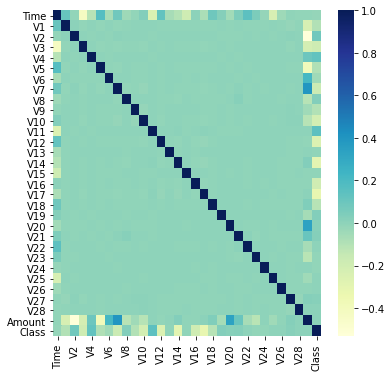

In [ ]:
import seaborn as sns
#df = sns.load_dataset('/content/drive/My Drive/credit_card/credit_card_train.csv')
import matplotlib.pyplot as plt
correlation_mat = fulldata.corr()
fig, ax = plt.subplots(figsize=(6,6)) 
sns.heatmap(correlation_mat, cmap="YlGnBu")#, annot=True)

plt.show()

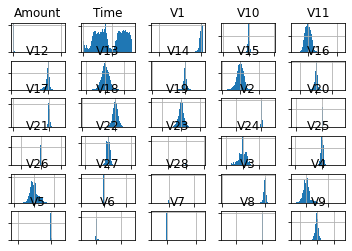

In [ ]:
# create histograms of input variables
from pandas import read_csv
from matplotlib import pyplot
# drop the target variable
datahist = fulldata.drop('Class', axis=1)
# create a histogram plot of each numeric variable
ax = datahist.hist(bins=100)
# disable axis labels
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
pyplot.show()

In [ ]:
# summarize the amount variable
print(fulldata['Amount'].describe())

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000,198608.000000
mean,94915.874194,0.005110,-0.004211,0.002225,0.000167,0.005016,-0.000353,0.001579,-0.000027,-0.003573,-0.001279,-0.000976,-0.000628,0.000987,-0.000863,0.000549,0.001792,-0.001112,0.002147,0.000718,0.000761,0.000803,-0.000037,-0.000383,0.000794,-0.000608,0.000302,0.001509,0.001568,88.321679
std,47485.527892,1.947329,1.646230,1.506249,1.419313,1.357244,1.324724,1.198614,1.174068,1.094811,1.072300,1.019369,0.993239,0.995029,0.954925,0.913558,0.873177,0.842606,0.836651,0.814301,0.754797,0.726609,0.724693,0.619957,0.604811,0.520734,0.481012,0.391031,0.329685,242.613439
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-32.092129,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.553697,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-6.938297,-23.646890,-34.830382,-9.499423,-32.828995,-2.824849,-8.696627,-2.604551,-22.565679,-11.710896,0.000000
25%,54273.750000,-0.915838,-0.599308,-0.887008,-0.849299,-0.688458,-0.767864,-0.552417,-0.208814,-0.644773,-0.534169,-0.763007,-0.405237,-0.647179,-0.427282,-0.581487,-0.466011,-0.484100,-0.498260,-0.455562,-0.211165,-0.228347,-0.541831,-0.161848,-0.354003,-0.318287,-0.326227,-0.070467,-0.052454,5.700000
50%,84857.000000,0.017120,0.064553,0.177689,-0.021783,-0.052050,-0.275956,0.041112,0.022225,-0.052730,-0.093569,-0.032512,0.137819,-0.012324,0.048826,0.049265,0.069176,-0.065560,-0.000728,0.005293,-0.062125,-0.029028,0.006670,-0.011426,0.041124,0.015730,-0.051608,0.001450,0.011547,22.080000
75%,139372.250000,1.315232,0.802486,1.026722,0.744018,0.613899,0.397925,0.572347,0.325911,0.594273,0.455951,0.739536,0.615491,0.663008,0.491024,0.647759,0.523658,0.396436,0.502384,0.459706,0.133446,0.186512,0.528889,0.147990,0.440287,0.350386,0.239481,0.091523,0.078860,77.710000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,21.393069,34.303177,19.587773,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,7.059132,8.538195,4.712398,5.572113,38.117209,27.202839,10.503090,22.528412,4.016342,7.519589,3.517346,12.152401,33.847808,18910.000000
